## Libs and Modules

In [1611]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from yellowbrick.target import class_balance
import os


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier, StackingClassifier
# import warnings
# warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split


## Entry Data

In [1391]:
sub = pd.read_csv(os.path.join('data', 'Test.csv')) 
df = pd.read_csv(os.path.join('data', 'Train.csv'))

## Exploratory Analysis

In [1147]:
df.tail()

Nome Best_Resolution Boost_Clock  \
3175                 6XQ6USO2OKE37VAB91G0JHQM8BDY      1366 x 768   1000 MHz    
3176             I27LCL2RJZDWZ9XB9QJU7SOUBOR5O235      1440 x 900         NaN   
3177             UINAFY25UJYCMETQEJC97T2KXUFH89AP     1680 x 1050         NaN   
3178  9SDMOEXS4208SB7D24OMUDUXH5M6RO4GL8UR4L063A9             NaN         NaN   
3179                      WYT6CKKXSI3SX8N37VSOPX7     3840 x 2160   1582 MHz    

     Core_Speed  DVI_Connection Dedicated  DisplayPort_Connection  \
3175    300 MHz             NaN        No                     NaN   
3176    775 MHz             1.0       Yes                     NaN   
3177    820 MHz             1.0       Yes                     NaN   
3178    850 MHz             2.0       Yes                     NaN   
3179   1480 MHz             2.0       Yes                     3.0   

      HDMI_Connection Integrated    L2_Cache  ...       Power_Connector  \
3175              NaN        Yes       512KB  ...                   NaN   
3176              1.0         No       256KB  ...                 None    
3177              1.0         No       512KB  ...                 None    
3178              1.0         No       512KB  ...                 None    
3179              1.0         No  1536KB(x2)  ...  1x 6-pin + 1x 8-pin    

     Process     ROPs Resolution_WxH SLI_Crossfire Shader   TMUs  \
3175    14nm        8      4096x2304            No    5.0   16.0   
3176    40nm        8      2560x1600           Yes    5.0   20.0   
3177    40nm       32      2560x1600           Yes    5.0   48.0   
3178    28nm       16      4096x2160           Yes    5.0   32.0   
3179    16nm  48 (x2)      7680x3200           Yes    5.0  112.0   

      Texture_Rate VGA_Connection DirectX  
3175   16 GTexel/s            NaN      12  
3176   16 GTexel/s            1.0      11  
3177   39 GTexel/s            0.0      11  
3178   27 GTexel/s            1.0      12  
3179  354 GTexel/s            0.0      12  

[5 rows x 29 columns]

In [1148]:
df.Process.unique()

array(['28nm', nan, '14nm', '16nm', '40nm', '22nm', '55nm', '65nm',
       '80nm', '90nm', '32nm', '110nm', '130nm', '150nm', '100nm'],
      dtype=object)

In [1149]:
df.shape

(3180, 29)

In [1150]:
df.dtypes.head(28)

Nome                       object
Best_Resolution            object
Boost_Clock                object
Core_Speed                 object
DVI_Connection            float64
Dedicated                  object
DisplayPort_Connection    float64
HDMI_Connection           float64
Integrated                 object
L2_Cache                   object
Max_Power                  object
Memory                     object
Memory_Bandwidth           object
Memory_Bus                 object
Memory_Speed               object
Memory_Type                object
Notebook_GPU               object
PSU                        object
Pixel_Rate                 object
Power_Connector            object
Process                    object
ROPs                       object
Resolution_WxH             object
SLI_Crossfire              object
Shader                    float64
TMUs                      float64
Texture_Rate               object
VGA_Connection            float64
dtype: object

In [1151]:
df.describe()

DVI_Connection  DisplayPort_Connection  HDMI_Connection       Shader  \
count     2501.000000              836.000000      2492.000000  3098.000000   
mean         1.368653                1.616029         0.864366     4.744061   
std          0.707701                1.221438         0.466525     0.644150   
min          0.000000                0.000000         0.000000     1.000000   
25%          1.000000                1.000000         1.000000     5.000000   
50%          1.000000                1.000000         1.000000     5.000000   
75%          2.000000                3.000000         1.000000     5.000000   
max          4.000000                4.000000         3.000000     5.000000   

              TMUs  VGA_Connection      DirectX  
count  2739.000000     2494.000000  3180.000000  
mean     70.230376        0.212109    11.420755  
std      54.450249        0.428991     0.964130  
min       1.000000        0.000000     8.000000  
25%      32.000000        0.000000    11.000000  
50%      56.000000        0.000000    12.000000  
75%     112.000000        0.000000    12.000000  
max     384.000000        4.000000    12.000000

In [1152]:
df.isna().sum().head(28) # Direct X (target) has no NaN values

Nome                         0
Best_Resolution            530
Boost_Clock               1768
Core_Speed                   0
DVI_Connection             679
Dedicated                   10
DisplayPort_Connection    2344
HDMI_Connection            688
Integrated                  10
L2_Cache                     0
Max_Power                  547
Memory                     366
Memory_Bandwidth           101
Memory_Bus                  47
Memory_Speed                91
Memory_Type                 43
Notebook_GPU                 0
PSU                       1051
Pixel_Rate                 445
Power_Connector            646
Process                    374
ROPs                       441
Resolution_WxH             150
SLI_Crossfire                0
Shader                      82
TMUs                       441
Texture_Rate               445
VGA_Connection             686
dtype: int64

In [1153]:
df.select_dtypes(include=[object]).notna().astype(str) # converts every object dtype column to string type

Nome Best_Resolution Boost_Clock Core_Speed Dedicated Integrated  \
0     True            True        True       True      True       True   
1     True           False       False       True      True       True   
2     True            True       False       True      True       True   
3     True            True        True       True      True       True   
4     True            True       False       True      True       True   
...    ...             ...         ...        ...       ...        ...   
3175  True            True        True       True      True       True   
3176  True            True       False       True      True       True   
3177  True            True       False       True      True       True   
3178  True           False       False       True      True       True   
3179  True            True        True       True      True       True   

     L2_Cache Max_Power Memory Memory_Bandwidth  ... Memory_Type Notebook_GPU  \
0        True      True   True             True  ...        True         True   
1        True      True   True             True  ...        True         True   
2        True      True   True             True  ...        True         True   
3        True     False   True             True  ...        True         True   
4        True      True   True             True  ...        True         True   
...       ...       ...    ...              ...  ...         ...          ...   
3175     True      True  False             True  ...        True         True   
3176     True     False   True             True  ...        True         True   
3177     True     False   True             True  ...        True         True   
3178     True     False   True             True  ...        True         True   
3179     True      True   True             True  ...        True         True   

        PSU Pixel_Rate Power_Connector Process   ROPs Resolution_WxH  \
0      True       True            True    True   True           True   
1     False      False           False   False  False           True   
2     False       True           False    True   True           True   
3      True       True            True    True   True           True   
4     False       True           False    True   True           True   
...     ...        ...             ...     ...    ...            ...   
3175  False       True           False    True   True           True   
3176   True       True            True    True   True           True   
3177  False       True            True    True   True           True   
3178   True       True            True    True   True           True   
3179   True       True            True    True   True           True   

     SLI_Crossfire Texture_Rate  
0             True         True  
1             True        False  
2             True         True  
3             True         True  
4             True         True  
...            ...          ...  
3175          True         True  
3176          True         True  
3177          True         True  
3178          True         True  
3179          True         True  

[3180 rows x 22 columns]

In [1154]:
df.iloc[:,:10].head(3)

Nome Best_Resolution Boost_Clock  \
0  GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19     1920 x 1080   1253 MHz    
1                           7JK45GGO3YLWSYL             NaN         NaN   
2                           ZC0GAMPBZGI7HE1      1366 x 768         NaN   

  Core_Speed  DVI_Connection Dedicated  DisplayPort_Connection  \
0   1076 MHz             1.0       Yes                     1.0   
1       \n-              NaN       Yes                     NaN   
2    810 MHz             NaN       Yes                     NaN   

   HDMI_Connection Integrated L2_Cache  
0              1.0         No   1024KB  
1              NaN         No      0KB  
2              NaN         No    256KB

In [1155]:
df.iloc[:,10:].head(3)

Max_Power    Memory Memory_Bandwidth Memory_Bus Memory_Speed Memory_Type  \
0  75 Watts  2048 MB       105.8GB/sec   128 Bit      1653 MHz       GDDR5   
1  50 Watts   512 MB        25.6GB/sec   128 Bit       800 MHz       GDDR3   
2  45 Watts  2048 MB        28.8GB/sec   128 Bit       900 MHz        DDR3   

  Notebook_GPU                 PSU   Pixel_Rate Power_Connector Process ROPs  \
0           No  350 Watt & 23 Amps  40 GPixel/s           None     28nm   32   
1          Yes                 NaN          NaN             NaN     NaN  NaN   
2          Yes                 NaN  13 GPixel/s             NaN    28nm   16   

  Resolution_WxH SLI_Crossfire  Shader  TMUs Texture_Rate  VGA_Connection  \
0      5120x3200           Yes     5.0  48.0  60 GTexel/s             0.0   
1      2560x1600            No     4.0   NaN          NaN             NaN   
2      4096x2160            No     5.0  32.0  26 GTexel/s             NaN   

   DirectX  
0       12  
1       10  
2       12

In [1156]:
df.columns

Index(['Nome', 'Best_Resolution', 'Boost_Clock', 'Core_Speed',
       'DVI_Connection', 'Dedicated', 'DisplayPort_Connection',
       'HDMI_Connection', 'Integrated', 'L2_Cache', 'Max_Power', 'Memory',
       'Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed', 'Memory_Type',
       'Notebook_GPU', 'PSU', 'Pixel_Rate', 'Power_Connector', 'Process',
       'ROPs', 'Resolution_WxH', 'SLI_Crossfire', 'Shader', 'TMUs',
       'Texture_Rate', 'VGA_Connection', 'DirectX'],
      dtype='object')

In [1157]:
df.DirectX.value_counts()

12    2155
11     441
10     391
9      153
8       40
Name: DirectX, dtype: int64

In [1158]:
labels = df.columns[1:]
labels

Index(['Best_Resolution', 'Boost_Clock', 'Core_Speed', 'DVI_Connection',
       'Dedicated', 'DisplayPort_Connection', 'HDMI_Connection', 'Integrated',
       'L2_Cache', 'Max_Power', 'Memory', 'Memory_Bandwidth', 'Memory_Bus',
       'Memory_Speed', 'Memory_Type', 'Notebook_GPU', 'PSU', 'Pixel_Rate',
       'Power_Connector', 'Process', 'ROPs', 'Resolution_WxH', 'SLI_Crossfire',
       'Shader', 'TMUs', 'Texture_Rate', 'VGA_Connection', 'DirectX'],
      dtype='object')

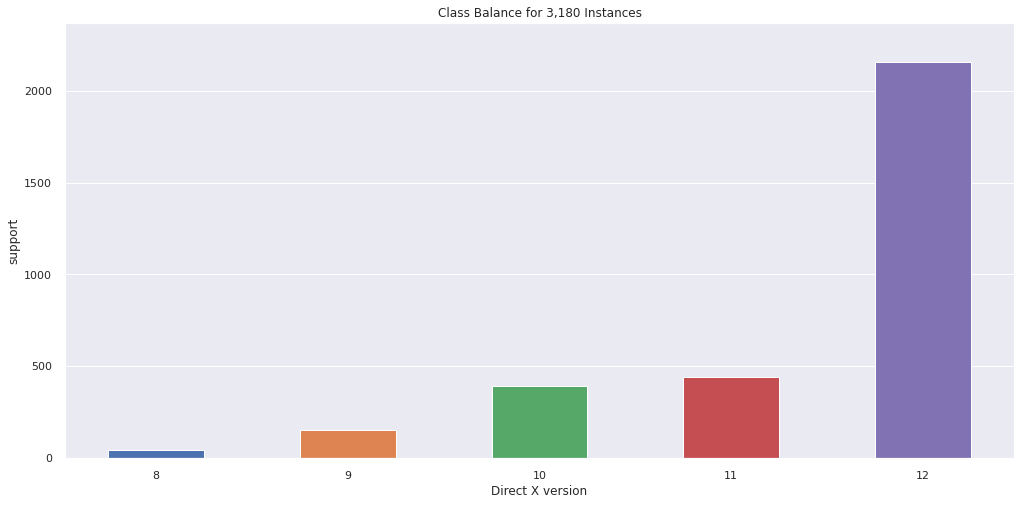

In [1159]:
plt.xlabel('Direct X version')
class_balance(df.DirectX) # also used to compare y_train and y_test classes distribution
plt.show()

#### The target classes [8,9,10,11,12] are unbalanced.

In [1160]:
sub.head()

Nome Best_Resolution Boost_Clock  \
0     M76XNVTL4M4ULZCFPEG95AHFECWN90T2JARFXG209YG     3840 x 2160         NaN   
1  7QUDV2P0AH29CTIFMANEW6YY56ZZMU0EEWQBTGL3V7Z8UQ     2560 x 1600   1190 MHz    
2                 ZXD50ONA8MZUHE1NY21ZUZ4BOFXZ9X0     1920 x 1080         NaN   
3                                 AO86XNGN8L42G2Z             NaN         NaN   
4                                 HM3LPJ50FKGK45O      1440 x 900         NaN   

  Core_Speed  DVI_Connection Dedicated  DisplayPort_Connection  \
0   1040 MHz             2.0       Yes                     0.0   
1   1102 MHz             1.0       Yes                     3.0   
2   1000 MHz             1.0       Yes                     NaN   
3       \n-              NaN       Yes                     NaN   
4    650 MHz             NaN       Yes                     NaN   

   HDMI_Connection Integrated    L2_Cache  ...    Pixel_Rate Power_Connector  \
0              1.0         No  1024KB(x2)  ...  133 GPixel/s       2x 8-pin    
1              1.0         No      3072KB  ...  114 GPixel/s       2x 8-pin    
2              1.0         No       512KB  ...   32 GPixel/s           None    
3              NaN         No         0KB  ...           NaN             NaN   
4              NaN         No       256KB  ...    5 GPixel/s             NaN   

  Process     ROPs Resolution_WxH SLI_Crossfire Shader   TMUs  Texture_Rate  \
0    28nm  64 (x2)      4096x2160           Yes    5.0  176.0  366 GTexel/s   
1    28nm       96      5120x3200           Yes    5.0  176.0  209 GTexel/s   
2    28nm       32      4096x2160           Yes    5.0   80.0   80 GTexel/s   
3     NaN      NaN            NaN            No    3.0    NaN           NaN   
4    40nm        8      2560x1600            No    5.0   20.0   13 GTexel/s   

  VGA_Connection  
0            0.0  
1            0.0  
2            0.0  
3            NaN  
4            NaN  

[5 rows x 28 columns]

In [1161]:
sub.describe()

DVI_Connection  DisplayPort_Connection  HDMI_Connection      Shader  \
count      152.000000               21.000000       148.000000  199.000000   
mean         1.171053                1.476190         0.486486    4.115578   
std          0.843960                1.327368         0.527947    1.059592   
min          0.000000                0.000000         0.000000    1.300000   
25%          0.000000                0.000000         0.000000    3.000000   
50%          1.000000                1.000000         0.000000    4.100000   
75%          2.000000                3.000000         1.000000    5.000000   
max          4.000000                3.000000         2.000000    5.000000   

             TMUs  VGA_Connection  
count  128.000000      151.000000  
mean    51.648438        0.331126  
std     51.101503        0.538168  
min      1.000000        0.000000  
25%     16.000000        0.000000  
50%     36.000000        0.000000  
75%     72.000000        1.000000  
max    224.000000        2.000000

In [1162]:
sub.shape

(220, 28)

In [1163]:
sub.isna().sum()

Nome                        0
Best_Resolution           107
Boost_Clock               186
Core_Speed                  0
DVI_Connection             68
Dedicated                   4
DisplayPort_Connection    199
HDMI_Connection            72
Integrated                  4
L2_Cache                    0
Max_Power                  73
Memory                     49
Memory_Bandwidth           15
Memory_Bus                 10
Memory_Speed               11
Memory_Type                 9
Notebook_GPU                0
PSU                       118
Pixel_Rate                 94
Power_Connector            60
Process                    84
ROPs                       92
Resolution_WxH             42
SLI_Crossfire               0
Shader                     21
TMUs                       92
Texture_Rate               94
VGA_Connection             69
dtype: int64

### We can concatenate both `sub` (220) and `df` (3180) together in a single dataframe called `data`  

In [1164]:
sub['DirectX'] = 0

data = pd.concat([df,sub],axis=0)
data.reset_index(inplace=True)

In [1165]:
data.tail()

index             Nome Best_Resolution Boost_Clock Core_Speed  \
3395    215      TWQEDZEYC2G             NaN         NaN       \n-    
3396    216  NWBFJQ60KW7ED39             NaN         NaN       \n-    
3397    217   4XNTK981BPTU4C             NaN         NaN         \n   
3398    218  T3UN6IX4HZD3WX8             NaN         NaN       \n-    
3399    219     LAU0WJD3PG6W       800 x 600         NaN       \n-    

      DVI_Connection Dedicated  DisplayPort_Connection  HDMI_Connection  \
3395             NaN        No                     NaN              NaN   
3396             2.0       Yes                     NaN              0.0   
3397             0.0        No                     NaN              0.0   
3398             1.0       Yes                     NaN              0.0   
3399             0.0        No                     NaN              1.0   

     Integrated  ... Power_Connector Process ROPs Resolution_WxH  \
3395        Yes  ...             NaN     NaN  NaN      2560x1600   
3396         No  ...           None      NaN  NaN            NaN   
3397        Yes  ...           None      NaN  NaN            NaN   
3398         No  ...           None      NaN  NaN      2560x1600   
3399        Yes  ...           None     80nm    4      1920x1440   

     SLI_Crossfire Shader TMUs Texture_Rate VGA_Connection DirectX  
3395            No    NaN  NaN          NaN            NaN       0  
3396            No    2.0  NaN          NaN            0.0       0  
3397            No    3.0  NaN          NaN            1.0       0  
3398           Yes    3.0  NaN          NaN            1.0       0  
3399           Yes    4.0  8.0   4 GTexel/s            1.0       0  

[5 rows x 30 columns]

#### For each column we'll have a different treatment, the ___`Nome`___ column is a kind of `primary_key`, so we'll not work with it;

In [1166]:
# df.drop(columns=['Nome'],inplace=True)

## Cleaning and Preprocessing Data

##### `Best_Resolution` [Ordinal Encoding]

In [1167]:
data.Best_Resolution

0       1920 x 1080
1               NaN
2        1366 x 768
3       1920 x 1080
4        1366 x 768
           ...     
3395            NaN
3396            NaN
3397            NaN
3398            NaN
3399      800 x 600
Name: Best_Resolution, Length: 3400, dtype: object

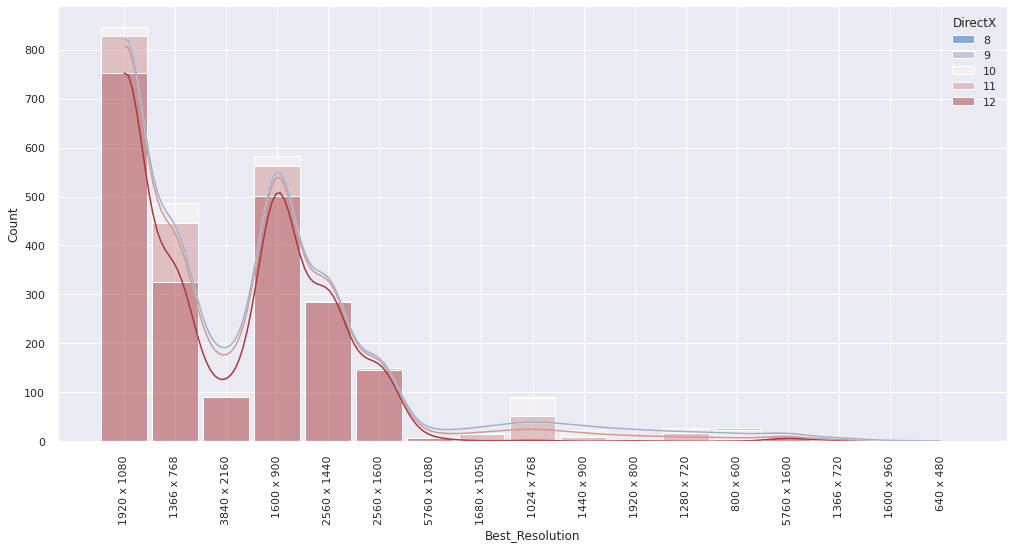

In [1168]:
sns.set(rc={'figure.figsize':(17,8)})
fig = sns.histplot(data=data[:3180], x="Best_Resolution", hue="DirectX", multiple="stack", shrink=0.9, kde=True, bins=17, palette='vlag')
plt.xticks(rotation=90)
plt.show()

In [1169]:
data.Best_Resolution.value_counts()

1920 x 1080    871
1600 x 900     609
1366 x 768     504
2560 x 1440    290
2560 x 1600    157
1024 x 768     104
3840 x 2160     93
800 x 600       33
1440 x 900      30
1280 x 720      29
1680 x 1050     19
5760 x 1600     11
5760 x 1080      6
1920 x 800       3
1366 x 720       2
1600 x 960       1
640 x 480        1
Name: Best_Resolution, dtype: int64

In [1170]:
def fixing_Best_Resolution(df,column):
    """
    describe later
    """
    br = df[column].str.split(r'\sx\s', expand=True)
    br.rename(columns={0: 'width', 1: 'height'},inplace=True)
    
    br.fillna(0,inplace=True)
    br = br.astype(int) # Only (width * height) have common resulting values, so we also sum them.
    br['Best_Resolution_transformed'] = (br.width * br.height) + (br.width + br.height)
    
    return br

data_br = fixing_Best_Resolution(data,'Best_Resolution')
new_data = pd.concat([data,data_br.Best_Resolution_transformed],axis=1)

In [1171]:
new_data[['Nome','Best_Resolution_transformed']].head()

Nome  Best_Resolution_transformed
0   GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19                      2076600
1                            7JK45GGO3YLWSYL                            0
2                            ZC0GAMPBZGI7HE1                      1051222
3  TOASMLBKENKUKMXGHHQ1CN95QZRZB2GF7G35KJMOC                      2076600
4                           G1C3DNBKSFIJ1QH9                      1051222

In [1172]:
# len(new_data.Best_Resolution_transformed.unique())
# sns.set(rc={'figure.figsize':(12,5)})
# sns.histplot(data=new_data[:3180], x="Best_Resolution_transformed", hue="DirectX", multiple="stack", shrink=0.8)

In [1173]:
def ordinal_enc_nmr(ls):
    """
    describe later
    """
    enc = 0
    old_x = 0
    enc_list = []
    
    for x in ls:

        if (x==0) or x==old_x:
            enc_list.append(enc)
        else:
            enc+=1
            enc_list.append(enc)

        old_x = x
    
    return enc_list


asc_br = new_data.Best_Resolution_transformed.sort_values().to_list()
encoded_list = ordinal_enc_nmr(asc_br)

index = new_data.Best_Resolution_transformed.sort_values().index
new_data.Best_Resolution_transformed.iloc[index] = encoded_list

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


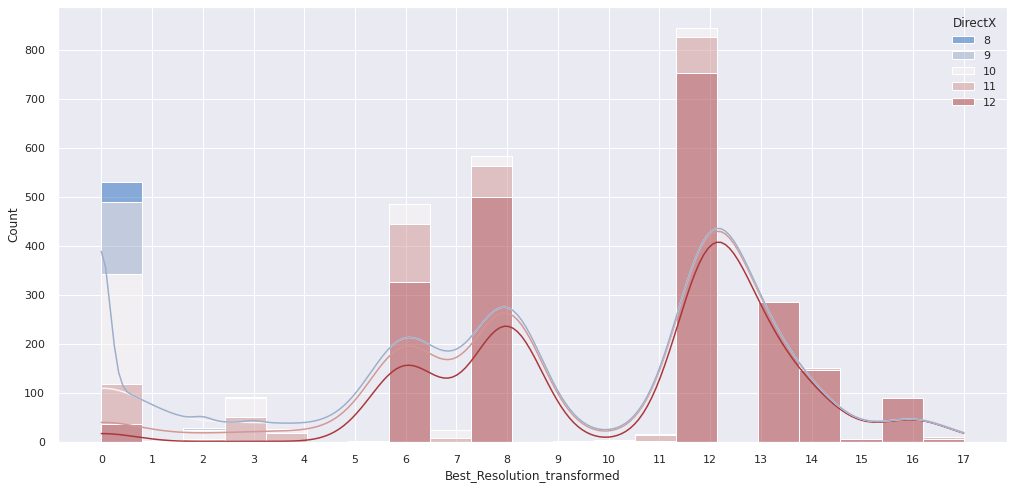

In [1174]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Best_Resolution_transformed", hue="DirectX", multiple="stack", shrink=1, kde=True, palette='vlag')
plt.xticks(np.arange(0, 18, step=1))
plt.show()

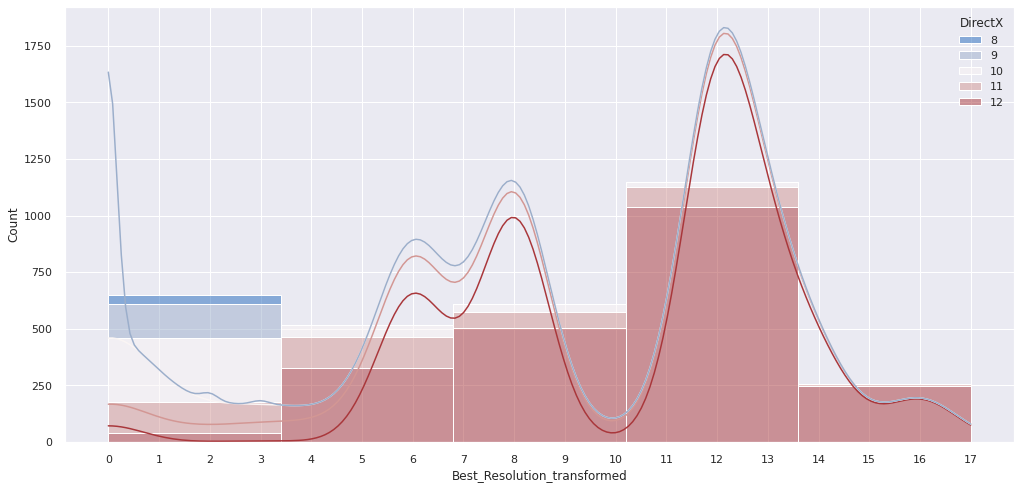

In [1175]:
sns.histplot(data=new_data[:3180], x="Best_Resolution_transformed", hue="DirectX", multiple="stack", kde=True, bins=5, palette='vlag')
plt.xticks(np.arange(0, 18, step=1))
plt.show()

##### `Boost_Clock`

In [1176]:
data.Boost_Clock

0       1253 MHz 
1             NaN
2             NaN
3       1111 MHz 
4             NaN
          ...    
3395          NaN
3396          NaN
3397          NaN
3398          NaN
3399          NaN
Name: Boost_Clock, Length: 3400, dtype: object

In [1177]:
data.Boost_Clock.str.split(r'(MHz\s)$',expand=True)[1].unique() #checking alternative units to MHz, like GHz,... in the column
# df.Boost_Clock.str.extract(r'\b([a-zA-Z][^\s]*)')

array(['MHz ', nan], dtype=object)

In [1178]:
def fixing_column(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Boost_Clock_values'},inplace=True)

    df.fillna(0,inplace=True) # int(Boost_Clock2_notNaN.mean())
    df = df.astype(int)

    return df

Boost_Clock = fixing_column(data,'Boost_Clock')

new_data = pd.concat([new_data,Boost_Clock],axis=1)

In [1179]:
new_data_notNan_train = new_data[(new_data.Boost_Clock_values > 0) & (new_data.DirectX != 0)]

In [1180]:
new_data_notNan_train.Boost_Clock_values.describe()

count    1412.000000
mean     1205.971671
std       253.409405
min       400.000000
25%      1050.000000
50%      1176.000000
75%      1317.000000
max      1936.000000
Name: Boost_Clock_values, dtype: float64

<AxesSubplot:xlabel='Boost_Clock_values', ylabel='Count'>

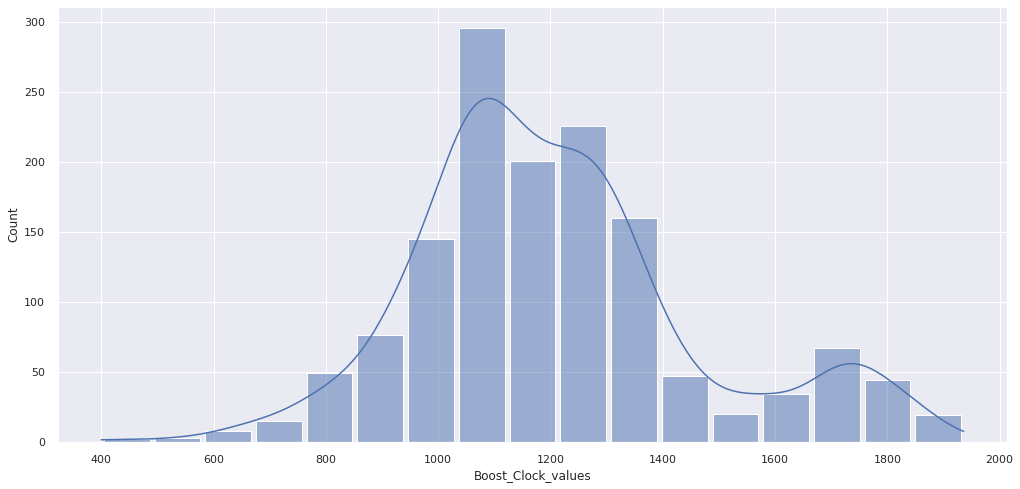

In [1181]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data_notNan_train, x="Boost_Clock_values", multiple="stack", shrink=0.9, kde=True, bins=17, palette='vlag')

<AxesSubplot:xlabel='Boost_Clock_values', ylabel='Count'>

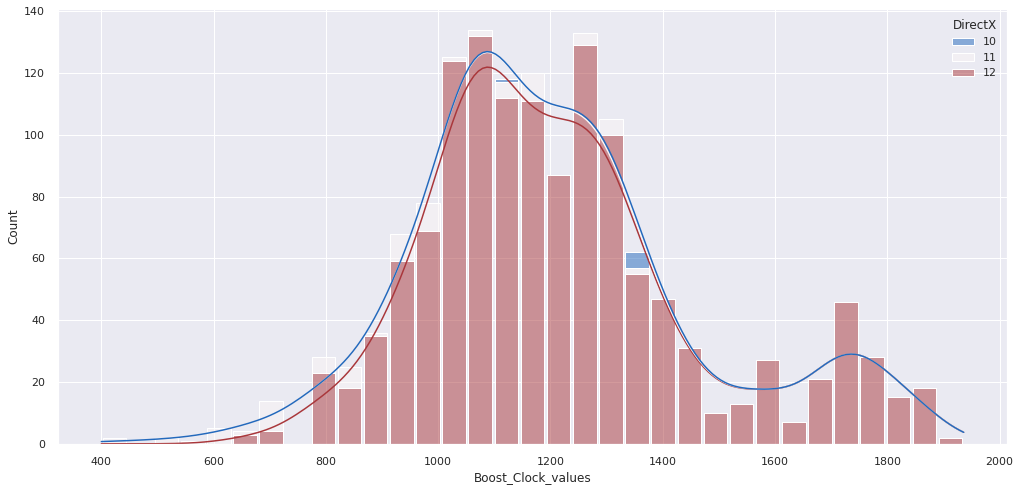

In [1182]:
fig, ax = plt.subplots()
sns.set_theme(rc={'figure.figsize':(17,8)})
# ax.set_xlim(0,2000)
sns.histplot(data=new_data_notNan_train, x="Boost_Clock_values", hue='DirectX', multiple="stack", shrink=0.9, kde=True, palette='vlag')

<AxesSubplot:xlabel='Boost_Clock_values', ylabel='Count'>

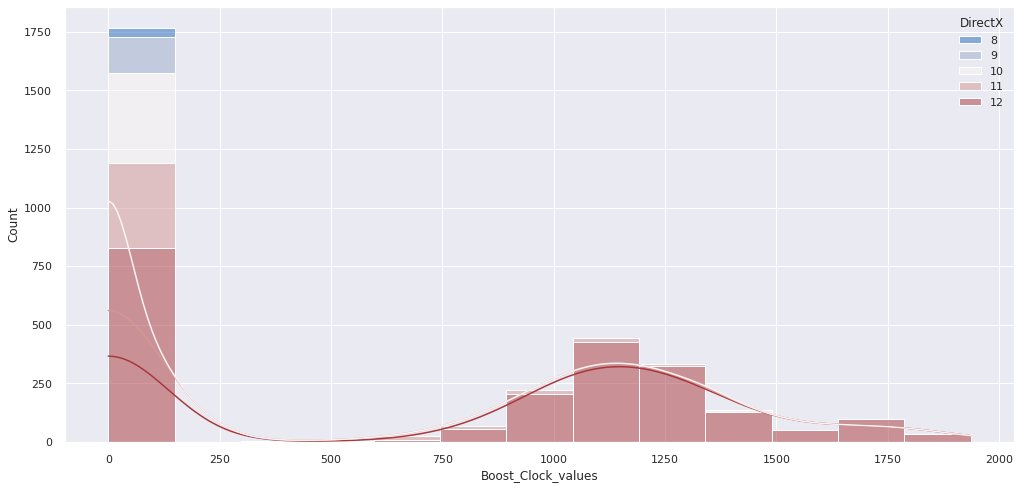

In [1183]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Boost_Clock_values", hue='DirectX', multiple="stack", kde=True, palette='vlag')

##### `Core_Speed`

In [1184]:
data.Core_Speed

0       1076 MHz
1           \n- 
2        810 MHz
3       1046 MHz
4        954 MHz
          ...   
3395        \n- 
3396        \n- 
3397          \n
3398        \n- 
3399        \n- 
Name: Core_Speed, Length: 3400, dtype: object

In [1185]:
data.Core_Speed.str.split(r'(MHz)$',expand=True)[1].unique() # None is due to \n- values

array(['MHz', None], dtype=object)

In [1186]:
# data.Core_Speed.str.split(r'\s(MHz)$',expand=True)[0]
data.Core_Speed.str.extract(r'^(\d+)') 

0
0     1076
1      NaN
2      810
3     1046
4      954
...    ...
3395   NaN
3396   NaN
3397   NaN
3398   NaN
3399   NaN

[3400 rows x 1 columns]

In [1187]:
def fixing_Core_Speed(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Core_Speed_val'}, inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

Core_Speed = fixing_Core_Speed(data,'Core_Speed')
new_data = pd.concat([new_data,Core_Speed],axis=1)

In [1188]:
new_data_notNan_train = new_data[(new_data.Core_Speed_val > 0) & (new_data.DirectX != 0)]
new_data_notNan_train.Core_Speed_val.describe()

count    2385.000000
mean      949.096855
std       274.621147
min       100.000000
25%       800.000000
50%       980.000000
75%      1097.000000
max      1784.000000
Name: Core_Speed_val, dtype: float64

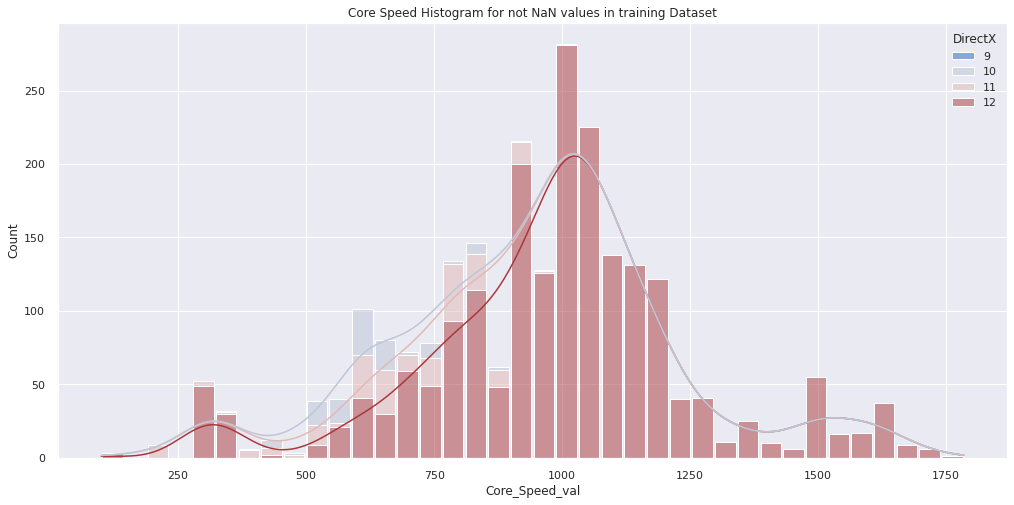

In [1189]:
fig, ax = plt.subplots()
# ax.set_xticks(range(1,32))
# bins = np.linspace(0, 1784, 100)
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data_notNan_train, x="Core_Speed_val", hue='DirectX', alpha=0.5, multiple="stack", 
                                                            shrink=0.9, kde=True, palette='vlag') #[:3180]
plt.title("Core Speed Histogram for not NaN values in training Dataset")
plt.show()

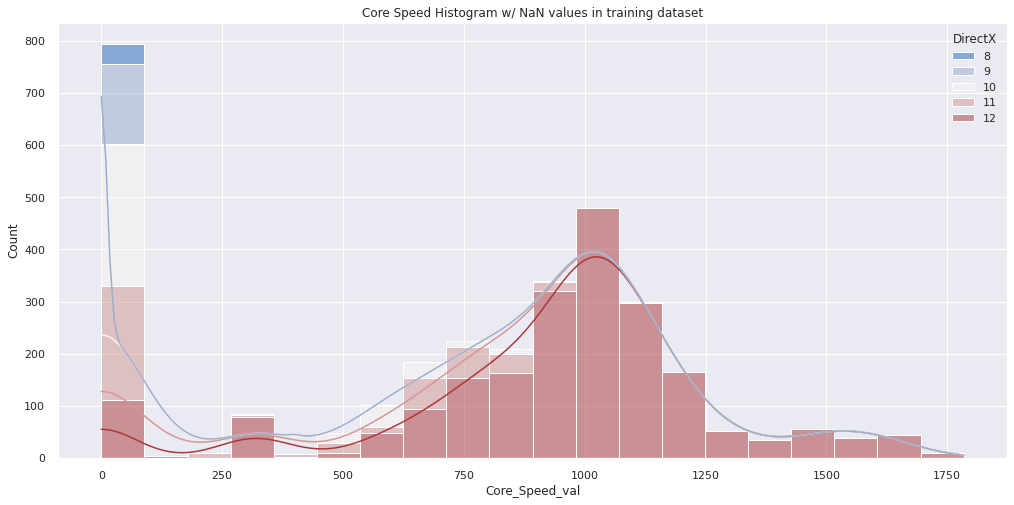

In [1190]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Core_Speed_val", hue='DirectX', multiple="stack", kde=True, palette='vlag', bins=20) #[:3180]
plt.title("Core Speed Histogram w/ NaN values in training dataset")
plt.show()

##### `DVI_Connection` [(MAYBE it's better to fill NaN w/ -1 instead of 0)] 

In [1191]:
data.DVI_Connection

0       1.0
1       NaN
2       NaN
3       1.0
4       NaN
       ... 
3395    NaN
3396    2.0
3397    0.0
3398    1.0
3399    0.0
Name: DVI_Connection, Length: 3400, dtype: float64

In [1192]:
data.DVI_Connection.value_counts()

1.0    1166
2.0    1155
0.0     298
4.0      23
3.0      11
Name: DVI_Connection, dtype: int64

In [1193]:
data.DVI_Connection.unique()

array([ 1., nan,  2.,  4.,  0.,  3.])

In [1194]:
data.DVI_Connection.isna().sum()

747

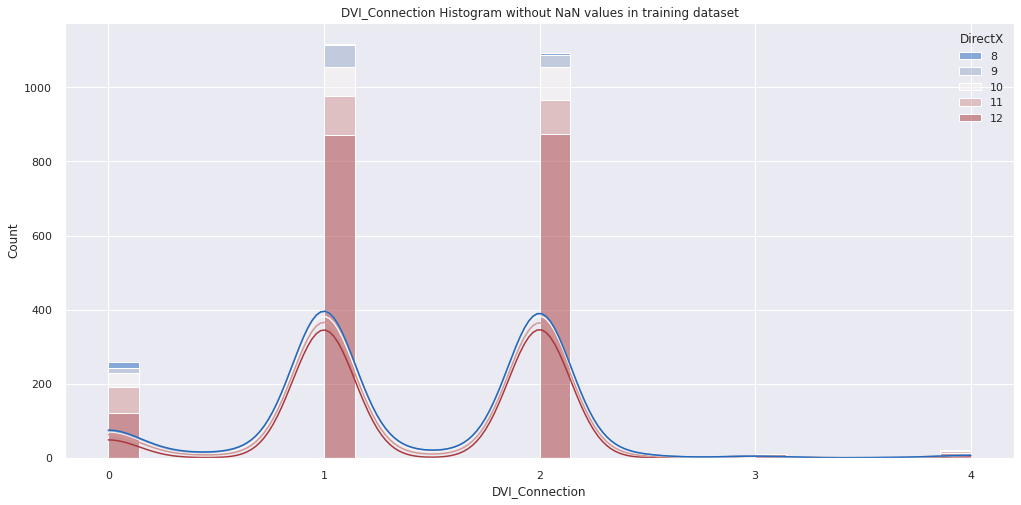

In [1195]:
plot_data = data[(data.DVI_Connection.notna()) & (data.DirectX != 0)]

sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=plot_data, x="DVI_Connection", hue='DirectX', multiple="stack", kde=True, palette='vlag') #[:3180]
plt.title("DVI_Connection Histogram without NaN values in training dataset")
plt.xticks([0, 1, 2, 3 ,4])
plt.show()

- We will assume this time that `NaN` values for `DVI_Connection` are the same as `0`.

In [1196]:
def fixing_DVI_Connection(df,column):
    df = df[column]
    df.rename('DVI_Connection_val',inplace=True)
    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

DVI_Connection = fixing_DVI_Connection(data,'DVI_Connection')
new_data = pd.concat([new_data,DVI_Connection], axis=1)

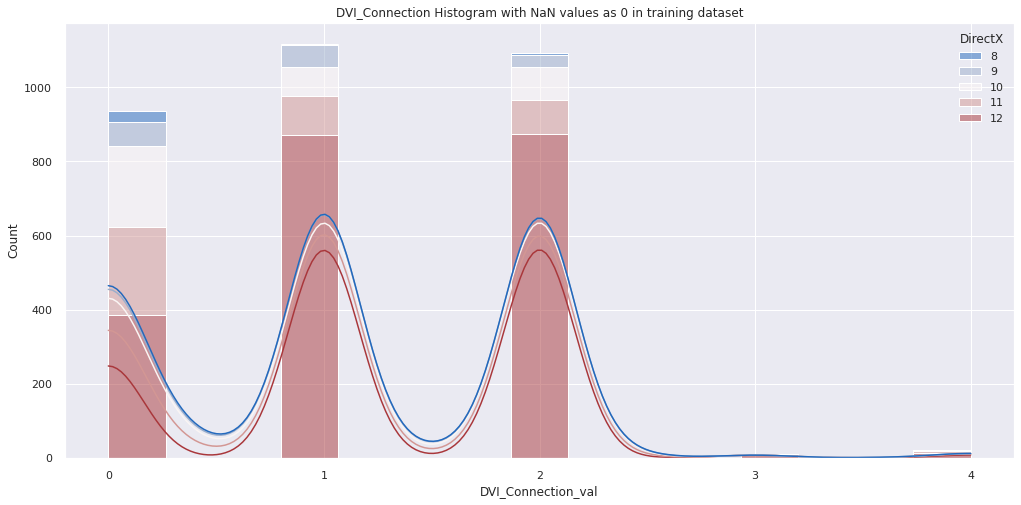

In [1197]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="DVI_Connection_val", hue='DirectX', multiple="stack",kde=True, palette='vlag') #[:3180]
plt.title("DVI_Connection Histogram with NaN values as 0 in training dataset")
plt.xticks([0, 1, 2, 3 ,4])
plt.show()

##### `Dedicated` [One Hot Encoding]

In [1198]:
data.Dedicated

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
3395     No
3396    Yes
3397     No
3398    Yes
3399     No
Name: Dedicated, Length: 3400, dtype: object

In [1199]:
data.Dedicated.unique()

array(['Yes', 'No', nan], dtype=object)

In [1200]:
print('Total missing NaN dtypes:', data.Dedicated[data.Dedicated.isna()].shape[0])

Total missing NaN dtypes: 14


- There are very few NaN `Dedicated` values, it sounds reasonable to replace them w/ `No`

In [1201]:
def fixing_Dedicated(df,column):
    df = pd.DataFrame(df[column])
    df.fillna('No', inplace=True)

    encoder = OneHotEncoder(drop="first",sparse=False)
    df["Dedicated_bin"] = encoder.fit_transform(df)

    return df["Dedicated_bin"]

Dedicated = fixing_Dedicated(data,'Dedicated')
new_data = pd.concat([new_data,Dedicated],axis=1)

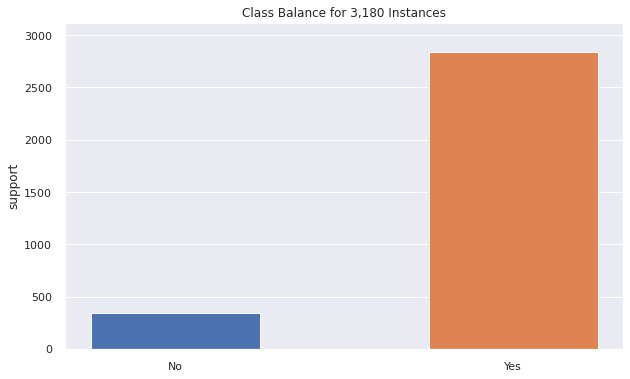

In [1202]:
sns.set_theme(rc={'figure.figsize':(10,6)})
class_balance(Dedicated[:3180], labels=["No", "Yes"])
plt.show()

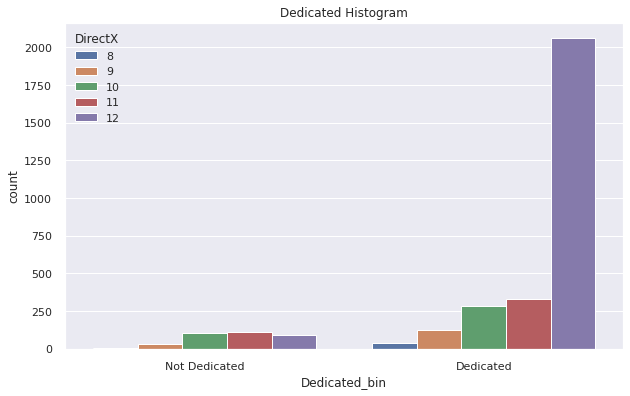

In [1203]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data=new_data[:3180], x="Dedicated_bin", hue='DirectX') #[:3180]
plt.title("Dedicated Histogram")
plt.xticks([0,1],['Not Dedicated','Dedicated'])
plt.show()

##### `DisplayPort_Connection`

In [1204]:
data.DisplayPort_Connection

0       1.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3395    NaN
3396    NaN
3397    NaN
3398    NaN
3399    NaN
Name: DisplayPort_Connection, Length: 3400, dtype: float64

In [1205]:
data.DisplayPort_Connection.value_counts()

3.0    314
1.0    252
0.0    204
2.0     80
4.0      7
Name: DisplayPort_Connection, dtype: int64

In [1206]:
print('NaN values for DisplayPort_Connection:', data.DisplayPort_Connection.isna().sum())

NaN values for DisplayPort_Connection: 2543


- `DisplayPort_Connection` is relatively rare, so It's reasonable to say that `NaN` values can be interpreted as missing Display Ports in the Graphic Card

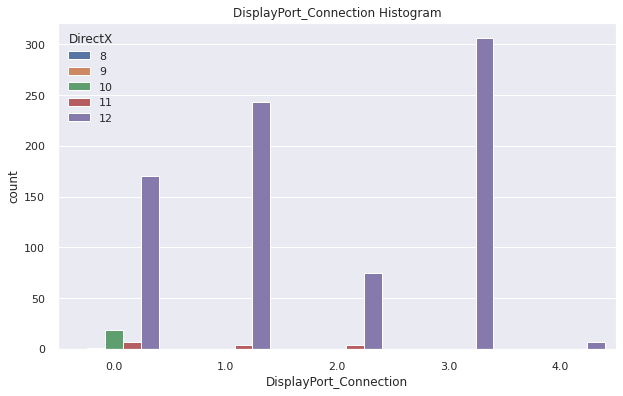

In [1207]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data=new_data[:3180], x="DisplayPort_Connection", hue='DirectX')
plt.title("DisplayPort_Connection Histogram")
plt.show()

In [1208]:
def fixing_DisplayPort_Connection(df,column):
    df = df[column].fillna(0)
    df.rename('DisplayPort_Connection_val',inplace=True)
    return df

DisplayPort_Connection = fixing_DisplayPort_Connection(data,'DisplayPort_Connection')
new_data = pd.concat([new_data,DisplayPort_Connection],axis=1)

#### `HDMI_Connection`

In [1209]:
data.HDMI_Connection

0       1.0
1       NaN
2       NaN
3       2.0
4       NaN
       ... 
3395    NaN
3396    0.0
3397    0.0
3398    0.0
3399    1.0
Name: HDMI_Connection, Length: 3400, dtype: float64

- And again, `missing values` will be interpreted as `0` 

In [1210]:
df.HDMI_Connection.unique()

array([ 1., nan,  2.,  0.,  3.])

In [1211]:
data.HDMI_Connection.value_counts()

1.0    2002
0.0     531
2.0      97
3.0      10
Name: HDMI_Connection, dtype: int64

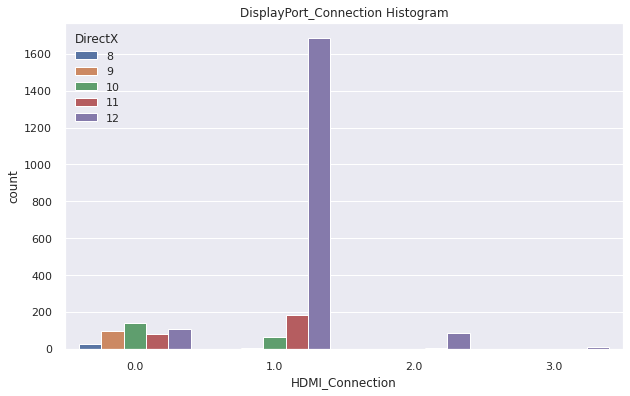

In [1212]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data=data[:3180], x="HDMI_Connection", hue='DirectX')
plt.title("DisplayPort_Connection Histogram")
plt.show()

In [1213]:
def fixing_HDMI_Connection(df,column):
    df = df[column].fillna(0)
    df.rename('HDMI_Connection_val',inplace=True)
    return df

HDMI_Connection = fixing_HDMI_Connection(data,'HDMI_Connection')
new_data = pd.concat([new_data,HDMI_Connection],axis=1)

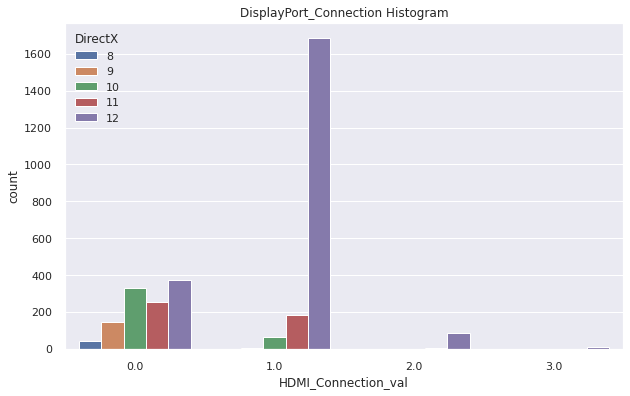

In [1214]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data=new_data[:3180], x="HDMI_Connection_val", hue='DirectX')
plt.title("DisplayPort_Connection Histogram")
plt.show()

#### `Integrated`

In [1215]:
data.Integrated

0        No
1        No
2        No
3        No
4        No
       ... 
3395    Yes
3396     No
3397    Yes
3398     No
3399    Yes
Name: Integrated, Length: 3400, dtype: object

In [1216]:
data.Integrated.unique()

array(['No', 'Yes', nan], dtype=object)

In [1217]:
print('Total missing NaN dtypes:', data.Integrated[data.Integrated.isna()].shape[0]) # very similar to Dedicated

Total missing NaN dtypes: 14


In [1218]:
def fixing_Integrated(df,column):
    df = pd.DataFrame(df[column])
    df.fillna('No', inplace=True)

    encoder = OneHotEncoder(drop="first",sparse=False)
    df["Integrated_bin"] = encoder.fit_transform(df)

    return df["Integrated_bin"]

Integrated = fixing_Integrated(data,'Integrated')
new_data = pd.concat([new_data,Integrated],axis=1)

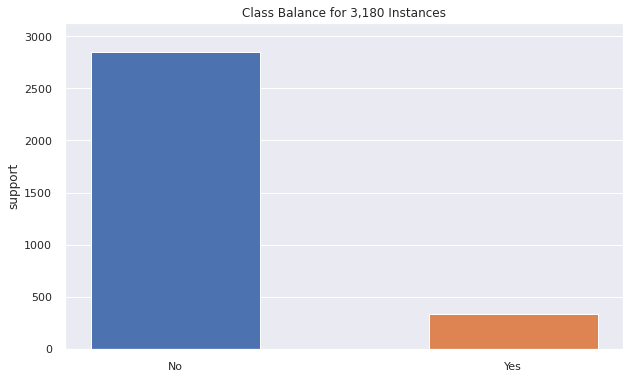

In [1219]:
sns.set_theme(rc={'figure.figsize':(10,6)})
class_balance(Integrated[:3180], labels=["No", "Yes"])
plt.show()

#### `L2_Cache`

In [1220]:
data.L2_Cache

0       1024KB
1          0KB
2        256KB
3        384KB
4        128KB
         ...  
3395       0KB
3396       0KB
3397       0KB
3398       0KB
3399       0KB
Name: L2_Cache, Length: 3400, dtype: object

In [1221]:
L2_Cache_NaN = data.L2_Cache.isna().sum()
print(f'L2_Cache has {L2_Cache_NaN} NaN values')

L2_Cache has 0 NaN values


In [1222]:
data.L2_Cache.unique()

array(['1024KB', '0KB', '256KB', '384KB', '128KB', '3072KB(x2)', '512KB',
       '1024KB(x2)', '768KB', '1792KB', '2048KB', '2048KB(x2)',
       '512KB(x2)', '768KB(x2)', '0KB(x2)', '768KB(x4)', '3072KB',
       '1536KB', '256KB(x2)', '640KB(x2)', '2048KB(x3)', '0KB(x4)',
       '512KB(x4)', '4096KB', '128KB(x2)', '1536KB(x2)', '640KB',
       '192KB(x2)', '768KB(x3)', '384KB(x3)', '2176KB(x2)', '384KB(x2)',
       '0KB(x3)', '4352KB', '2304KB(x2)'], dtype=object)

In [1223]:
print('There are',len(data.L2_Cache.unique()),'L2_Cache unique values')

There are 35 L2_Cache unique values


In [1224]:
data.L2_Cache.value_counts().tail(10)

2048KB(x3)    2
640KB(x2)     2
768KB(x3)     2
128KB(x2)     1
192KB(x2)     1
384KB(x3)     1
2176KB(x2)    1
0KB(x3)       1
4352KB        1
2304KB(x2)    1
Name: L2_Cache, dtype: int64

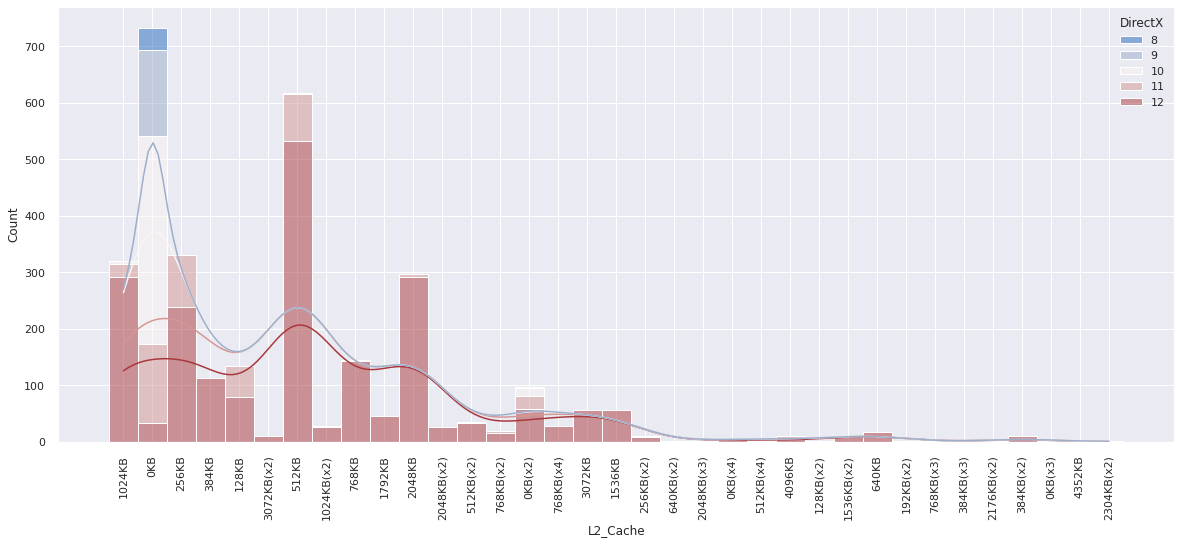

In [1225]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.histplot(data=data[:3180], x="L2_Cache", hue='DirectX', multiple="stack", shrink=1, kde=True, palette='vlag')
plt.xticks(rotation=90)
plt.show()

In [1226]:
def fixing_L2_Cache(df,column):
    """
    describe later
    """
    df = df[column].str.split(r'(\d+)', expand=True)[[1,3]]
    df.rename(columns={1: 'number', 3: 'multiplicity'},inplace=True)
    df.multiplicity.fillna(1,inplace=True) 

    df = df.astype(int) # Only (number+1)*(multiplicity)^2 have uncommon resulting values, cannot just sum or multiply individually
    df['L2_Cache_transf'] = (df.number+1)**2 * ((df.multiplicity)**2)    
    return df.L2_Cache_transf

In [1227]:
L2_Cache = fixing_L2_Cache(data,'L2_Cache')
new_data = pd.concat([new_data,L2_Cache],axis=1)

L2_Cache_ls = L2_Cache.sort_values().to_list()
L2_Cache_enc = ordinal_enc_nmr(L2_Cache_ls)

index = L2_Cache.sort_values().index
new_data.L2_Cache_transf.iloc[index] = L2_Cache_enc

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='L2_Cache_transf', ylabel='Count'>

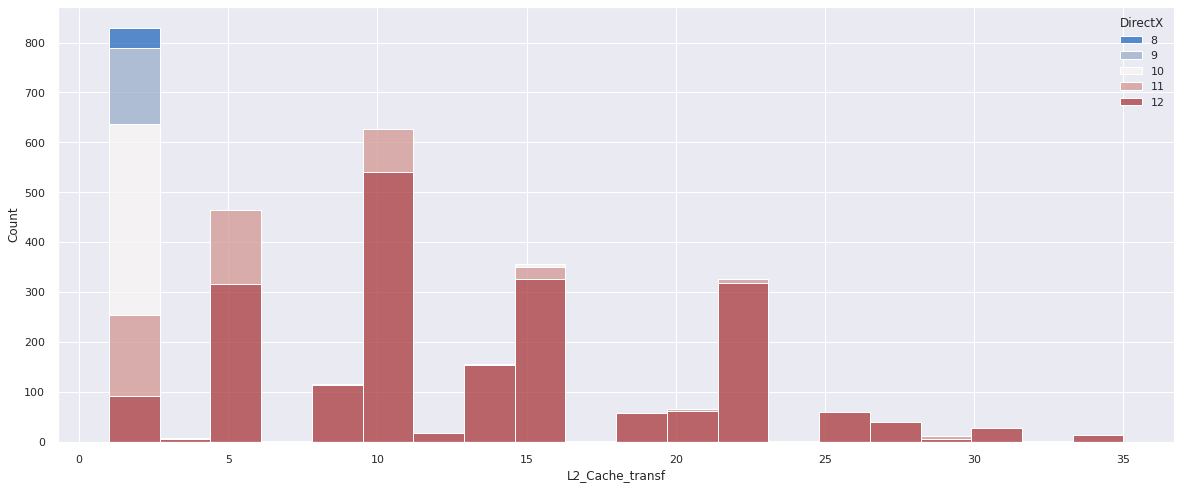

In [1228]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.histplot(data=new_data[:3180], x="L2_Cache_transf", hue='DirectX', multiple="stack", shrink=1, palette='vlag')

In [1229]:
data.iloc[:,5:]

DVI_Connection Dedicated  DisplayPort_Connection  HDMI_Connection  \
0                1.0       Yes                     1.0              1.0   
1                0.0       Yes                     NaN              NaN   
2                0.0       Yes                     NaN              NaN   
3                1.0       Yes                     NaN              2.0   
4                0.0       Yes                     NaN              NaN   
...              ...       ...                     ...              ...   
3395             0.0        No                     NaN              NaN   
3396             2.0       Yes                     NaN              0.0   
3397             0.0        No                     NaN              0.0   
3398             1.0       Yes                     NaN              0.0   
3399             0.0        No                     NaN              1.0   

     Integrated L2_Cache Max_Power    Memory Memory_Bandwidth Memory_Bus  ...  \
0            No   1024KB  75 Watts  2048 MB       105.8GB/sec   128 Bit   ...   
1            No      0KB  50 Watts   512 MB        25.6GB/sec   128 Bit   ...   
2            No    256KB  45 Watts  2048 MB        28.8GB/sec   128 Bit   ...   
3            No    384KB       NaN  2048 MB       144.2GB/sec   192 Bit   ...   
4            No    128KB  25 Watts  1024 MB        14.4GB/sec    64 Bit   ...   
...         ...      ...       ...       ...              ...        ...  ...   
3395        Yes      0KB       NaN       NaN       10.7GB/sec    64 Bit   ...   
3396         No      0KB       NaN   128 MB        12.8GB/sec   128 Bit   ...   
3397        Yes      0KB       NaN       NaN        6.4GB/sec    64 Bit   ...   
3398         No      0KB  23 Watts   256 MB         5.3GB/sec    64 Bit   ...   
3399        Yes      0KB       NaN       NaN              NaN        NaN  ...   

     Power_Connector Process ROPs Resolution_WxH SLI_Crossfire Shader  TMUs  \
0              None     28nm   32      5120x3200           Yes    5.0  48.0   
1                NaN     NaN  NaN      2560x1600            No    4.0   NaN   
2                NaN    28nm   16      4096x2160            No    5.0  32.0   
3              None     28nm   24      4096x2160           Yes    5.0  80.0   
4                NaN    28nm    8      4096x2160            No    5.0  32.0   
...              ...     ...  ...            ...           ...    ...   ...   
3395             NaN     NaN  NaN      2560x1600            No    NaN   NaN   
3396           None      NaN  NaN            NaN            No    2.0   NaN   
3397           None      NaN  NaN            NaN            No    3.0   NaN   
3398           None      NaN  NaN      2560x1600           Yes    3.0   NaN   
3399           None     80nm    4      1920x1440           Yes    4.0   8.0   

     Texture_Rate VGA_Connection DirectX  
0     60 GTexel/s            0.0      12  
1             NaN            NaN      10  
2     26 GTexel/s            NaN      12  
3     89 GTexel/s            0.0      12  
4     31 GTexel/s            NaN      12  
...           ...            ...     ...  
3395          NaN            NaN       0  
3396          NaN            0.0       0  
3397          NaN            1.0       0  
3398          NaN            1.0       0  
3399   4 GTexel/s            1.0       0  

[3400 rows x 25 columns]

In [1230]:
new_data

index                                       Nome Best_Resolution  \
0         0   GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19     1920 x 1080   
1         1                            7JK45GGO3YLWSYL             NaN   
2         2                            ZC0GAMPBZGI7HE1      1366 x 768   
3         3  TOASMLBKENKUKMXGHHQ1CN95QZRZB2GF7G35KJMOC     1920 x 1080   
4         4                           G1C3DNBKSFIJ1QH9      1366 x 768   
...     ...                                        ...             ...   
3395    215                                TWQEDZEYC2G             NaN   
3396    216                            NWBFJQ60KW7ED39             NaN   
3397    217                             4XNTK981BPTU4C             NaN   
3398    218                            T3UN6IX4HZD3WX8             NaN   
3399    219                               LAU0WJD3PG6W       800 x 600   

     Boost_Clock Core_Speed  DVI_Connection Dedicated  DisplayPort_Connection  \
0      1253 MHz    1076 MHz             1.0       Yes                     1.0   
1            NaN       \n-              NaN       Yes                     NaN   
2            NaN    810 MHz             NaN       Yes                     NaN   
3      1111 MHz    1046 MHz             1.0       Yes                     NaN   
4            NaN    954 MHz             NaN       Yes                     NaN   
...          ...        ...             ...       ...                     ...   
3395         NaN       \n-              NaN        No                     NaN   
3396         NaN       \n-              2.0       Yes                     NaN   
3397         NaN         \n             0.0        No                     NaN   
3398         NaN       \n-              1.0       Yes                     NaN   
3399         NaN       \n-              0.0        No                     NaN   

      HDMI_Connection Integrated  ... DirectX Best_Resolution_transformed  \
0                 1.0         No  ...      12                          12   
1                 NaN         No  ...      10                           0   
2                 NaN         No  ...      12                           6   
3                 2.0         No  ...      12                          12   
4                 NaN         No  ...      12                           6   
...               ...        ...  ...     ...                         ...   
3395              NaN        Yes  ...       0                           0   
3396              0.0         No  ...       0                           0   
3397              0.0        Yes  ...       0                           0   
3398              0.0         No  ...       0                           0   
3399              1.0        Yes  ...       0                           2   

     Boost_Clock_values Core_Speed_val DVI_Connection_val Dedicated_bin  \
0                  1253           1076                  1           1.0   
1                     0              0                  0           1.0   
2                     0            810                  0           1.0   
3                  1111           1046                  1           1.0   
4                     0            954                  0           1.0   
...                 ...            ...                ...           ...   
3395                  0              0                  0           0.0   
3396                  0              0                  2           1.0   
3397                  0              0                  0           0.0   
3398                  0              0                  1           1.0   
3399                  0              0                  0           0.0   

     DisplayPort_Connection_val HDMI_Connection_val Integrated_bin  \
0                           1.0                 1.0            0.0   
1                           0.0                 0.0            0.0   
2                           0.0                 0.0            0.0   
3                           0.0       

#### `Max_Power`

In [1231]:
data.Max_Power

0       75 Watts
1       50 Watts
2       45 Watts
3            NaN
4       25 Watts
          ...   
3395         NaN
3396         NaN
3397         NaN
3398    23 Watts
3399         NaN
Name: Max_Power, Length: 3400, dtype: object

In [1232]:
Max_Power_NaN = data.Max_Power.isna().sum()
print(f'Max_Power has {Max_Power_NaN} NaN values')

Max_Power has 620 NaN values


In [1233]:
def fixing_Max_Power(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Max_Power_val'}, inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)
    
    return df

Core_Speed = fixing_Max_Power(data,'Max_Power')
new_data = pd.concat([new_data,Core_Speed],axis=1)

In [1234]:
new_data_notNan_train = new_data[(new_data.Max_Power_val > 0) & (new_data.DirectX != 0)]
new_data_notNan_train.Max_Power_val.describe()

count    2633.000000
mean      127.045575
std       102.605966
min         4.000000
25%        49.000000
50%       108.000000
75%       175.000000
max       780.000000
Name: Max_Power_val, dtype: float64

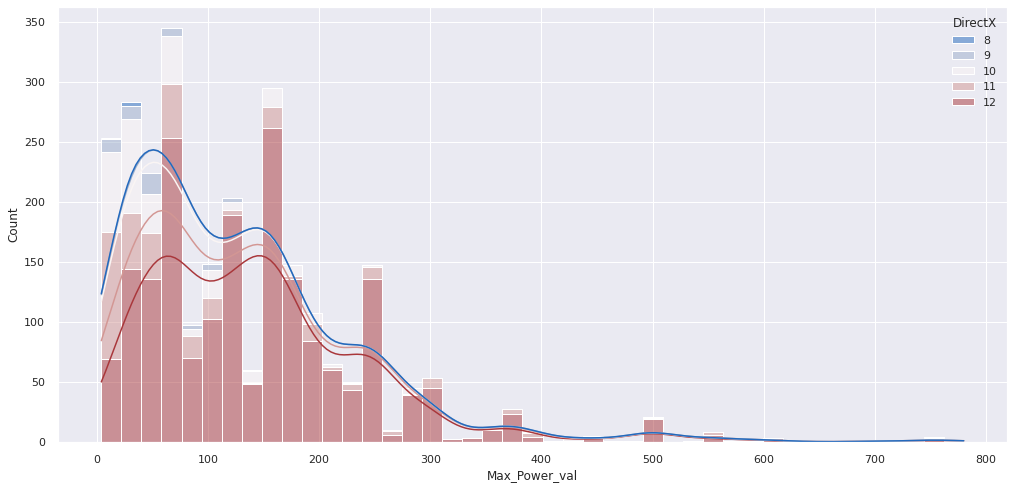

In [1235]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data_notNan_train, x="Max_Power_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

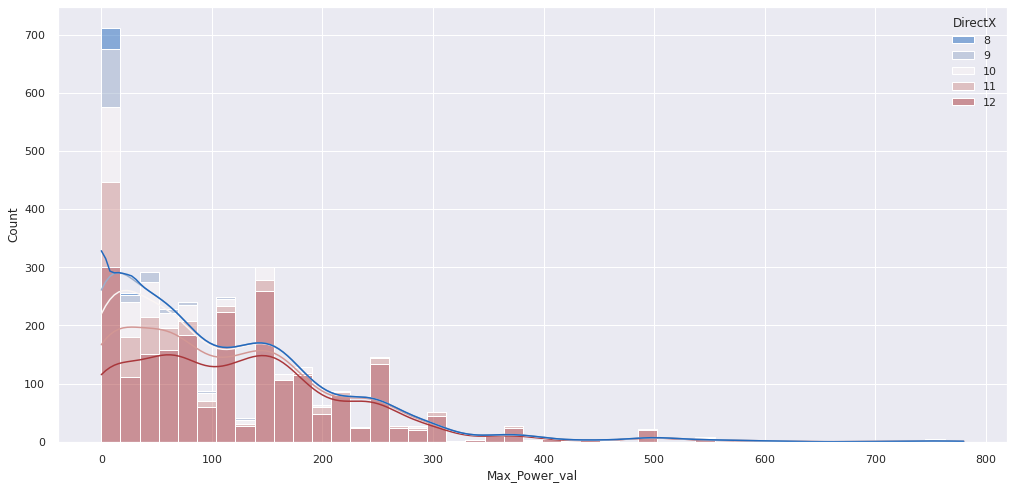

In [1236]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Max_Power_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Memory`

In [1237]:
data.Memory

0       2048 MB 
1        512 MB 
2       2048 MB 
3       2048 MB 
4       1024 MB 
          ...   
3395         NaN
3396     128 MB 
3397         NaN
3398     256 MB 
3399         NaN
Name: Memory, Length: 3400, dtype: object

In [1238]:
Memory_unique = len(data.Memory.unique())
print(f'Memory has {Memory_unique} unique values')

Memory has 30 unique values


In [1239]:
Memory_NaN = data.Memory.isna().sum()
print(f'Memory has {Memory_NaN} NaN values')

Memory has 415 NaN values


In [1240]:
def fixing_Memory(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Memory_val'}, inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)
    
    return df

Memory = fixing_Memory(data,'Memory')
new_data = pd.concat([new_data,Memory],axis=1)

In [1241]:
new_data_notNan_train = new_data[(new_data.Memory_val > 0) & (new_data.DirectX != 0)]
new_data_notNan_train.Memory_val.describe()

count     2814.000000
mean      2954.345416
std       2805.430732
min         16.000000
25%       1024.000000
50%       2048.000000
75%       4096.000000
max      32000.000000
Name: Memory_val, dtype: float64

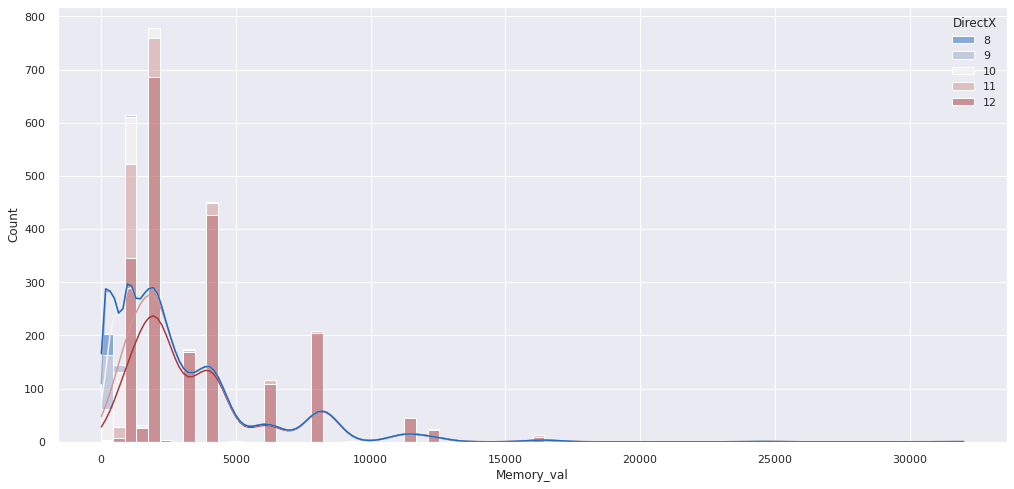

In [1242]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data_notNan_train, x="Memory_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

In [1243]:
oe = OrdinalEncoder(dtype=int)

new_data.Memory_val = oe.fit_transform(Memory)

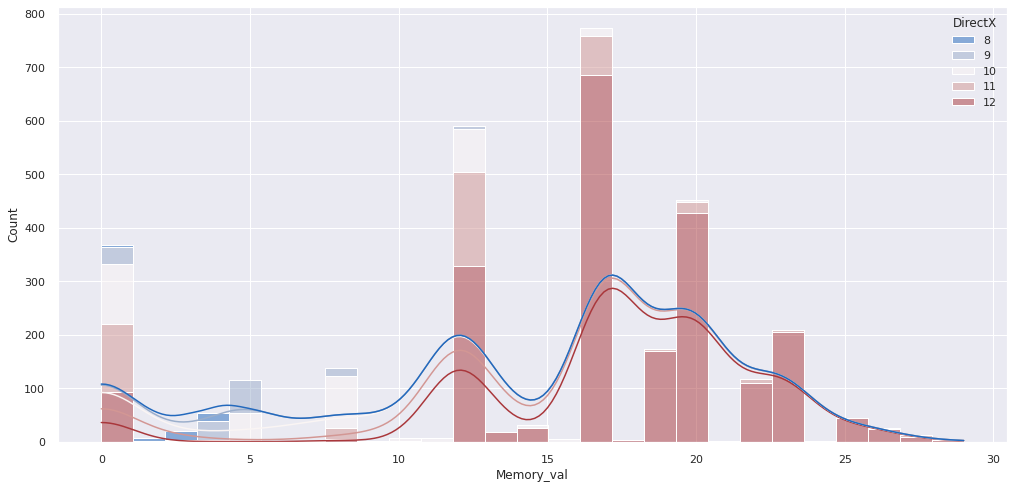

In [1244]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Memory_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Memory_Bandwidth`

In [1245]:
data.Memory_Bandwidth

0       105.8GB/sec
1        25.6GB/sec
2        28.8GB/sec
3       144.2GB/sec
4        14.4GB/sec
           ...     
3395     10.7GB/sec
3396     12.8GB/sec
3397      6.4GB/sec
3398      5.3GB/sec
3399            NaN
Name: Memory_Bandwidth, Length: 3400, dtype: object

In [1246]:
data.Memory_Bandwidth.str.extract(r'^(\d+\.\d+)').astype(float).sort_values(by=0).head()

0
3316  1.1
61    1.1
1811  1.2
1889  1.3
2464  1.3

In [1247]:
Memory_Bandwidth_NaN = data.Memory_Bandwidth.isna().sum()
print(f'Memory has {Memory_Bandwidth_NaN} NaN values')

Memory has 116 NaN values


In [1248]:
def fixing_Memory_Bandwidth(df,column):
    df = df[column].str.extract(r'^(\d+\.\d+)')
    df.rename(columns={0 : 'Memory_Bandwidth_val'}, inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(float)
    
    return df

Memory = fixing_Memory_Bandwidth(data,'Memory_Bandwidth')
new_data = pd.concat([new_data,Memory],axis=1)

In [1249]:
new_data_notNan_train = new_data[(new_data.Memory_Bandwidth_val > 0) & (new_data.DirectX != 0)]
new_data_notNan_train.Memory_Bandwidth_val.describe()

count    2245.000000
mean      126.640935
std       126.052184
min         1.100000
25%        25.600000
50%       102.400000
75%       192.300000
max       692.400000
Name: Memory_Bandwidth_val, dtype: float64

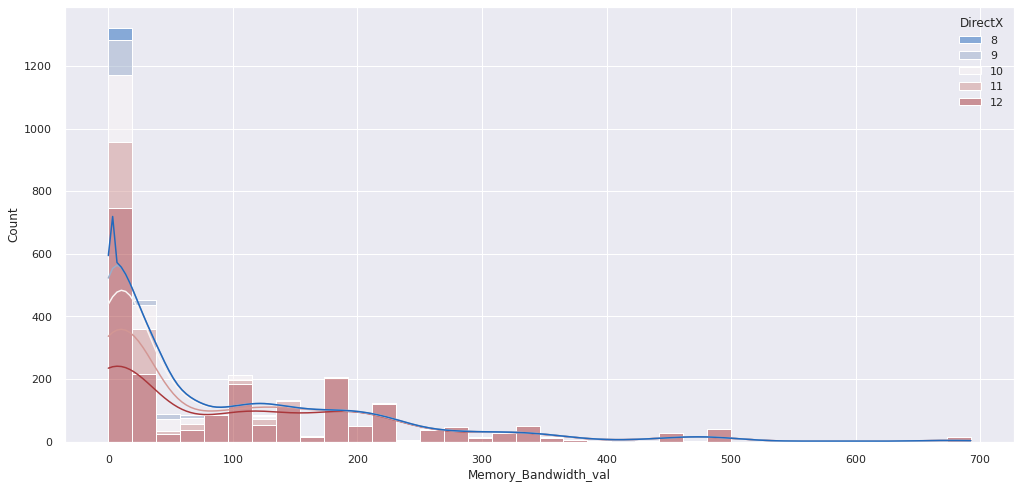

In [1250]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Memory_Bandwidth_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Memory_Bus` 

In [1251]:
data.Memory_Bus

0       128 Bit 
1       128 Bit 
2       128 Bit 
3       192 Bit 
4        64 Bit 
          ...   
3395     64 Bit 
3396    128 Bit 
3397     64 Bit 
3398     64 Bit 
3399         NaN
Name: Memory_Bus, Length: 3400, dtype: object

In [1252]:
data.Memory_Bus.unique()

array(['128 Bit ', '192 Bit ', '64 Bit ', '384 Bit ', '512 Bit ',
       '256 Bit ', '88 Bit ', '320 Bit ', '352 Bit ', nan, '448 Bit ',
       '32 Bit ', '4096 Bit ', '3072 Bit ', '8192 Bit ', '768 Bit ',
       '176 Bit ', '96 Bit '], dtype=object)

In [1253]:
Memory_Bus_unique = len(data.Memory_Bus.unique())
print(f'Memory_Bus has {Memory_Bus_unique} unique values')

Memory_Bus has 18 unique values


In [1254]:
Memory_Bus_NaN = data.Memory_Bus.isna().sum()
print(f'Memory has {Memory_Bus_NaN} NaN values')

Memory has 57 NaN values


In [1255]:
def fixing_Memory_Bus(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Memory_Bus_val'}, inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)
    
    return df

Memory_Bus = fixing_Memory_Bus(data,'Memory_Bus')

oe = OrdinalEncoder(dtype=int)
Memory_Bus_val = pd.DataFrame(oe.fit_transform(Memory_Bus), columns=['Memory_Bus_val'])

new_data = pd.concat([new_data,Memory_Bus_val],axis=1)

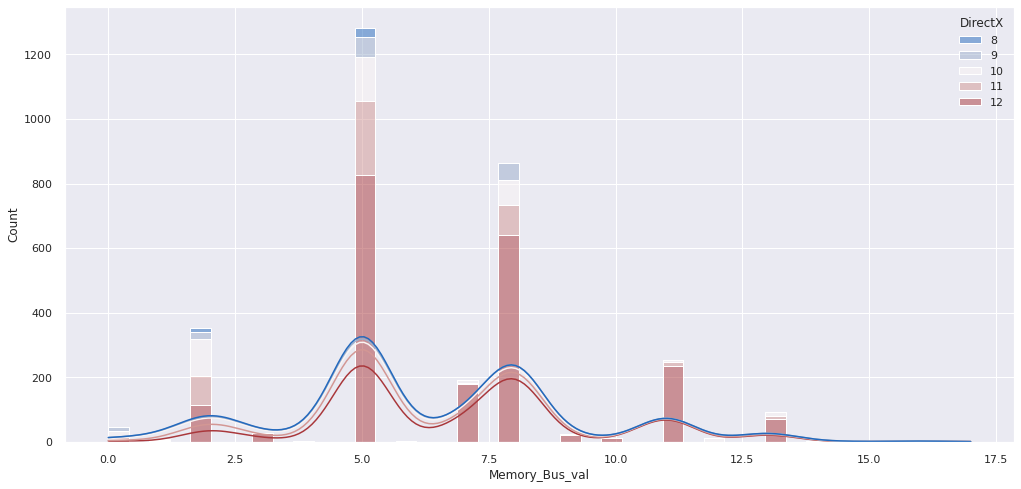

In [1256]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Memory_Bus_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Memory_Speed`

In [1257]:
data.Memory_Speed

0       1653 MHz
1        800 MHz
2        900 MHz
3       1502 MHz
4        900 MHz
          ...   
3395     667 MHz
3396     400 MHz
3397     400 MHz
3398     333 MHz
3399     800 MHz
Name: Memory_Speed, Length: 3400, dtype: object

In [1258]:
Memory_Speed_NaN = data.Memory_Speed.isna().sum()
print(f'Memory has {Memory_Speed_NaN} NaN values')

Memory has 102 NaN values


In [1259]:
def fixing_Memory_Speed(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Memory_Speed_val'},inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

Memory_Speed = fixing_Memory_Speed(data,'Memory_Speed')

new_data = pd.concat([new_data,Memory_Speed],axis=1)

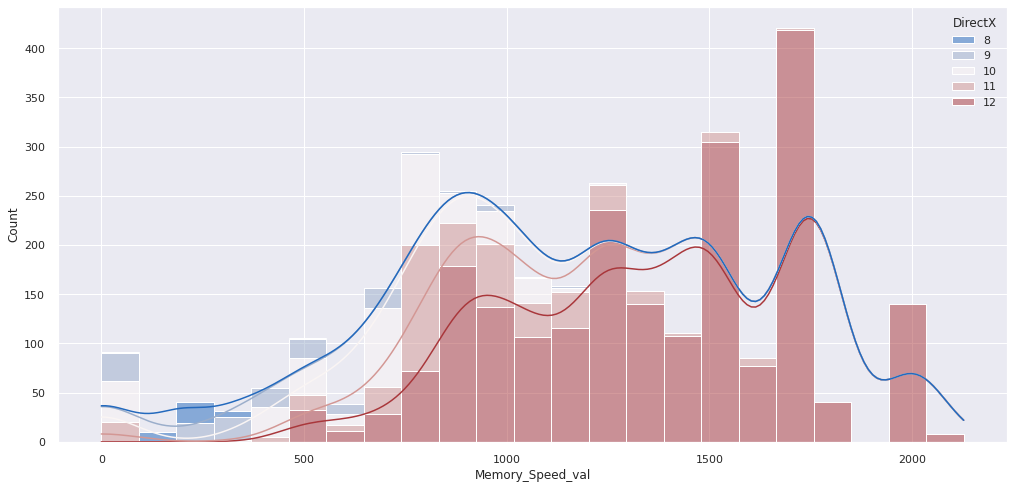

In [1260]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Memory_Speed_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Memory_Type`

In [1261]:
data.Memory_Type

0       GDDR5
1       GDDR3
2        DDR3
3       GDDR5
4        DDR3
        ...  
3395     DDR3
3396     DDR2
3397     DDR2
3398     DDR2
3399     DDR2
Name: Memory_Type, Length: 3400, dtype: object

In [1262]:
data.Memory_Type.unique()

array(['GDDR5', 'GDDR3', 'DDR3', 'DDR4', 'GDDR5X', 'DDR2', nan, 'GDDR4',
       'DDR', 'GDDR2', 'HBM-1', 'HBM-2', 'eDRAM'], dtype=object)

In [1263]:
data.Memory_Type.value_counts()

GDDR5     2020
DDR3       657
GDDR3      299
DDR        112
DDR2       102
GDDR5X      79
DDR4        51
GDDR4        8
HBM-1        6
HBM-2        6
GDDR2        5
eDRAM        3
Name: Memory_Type, dtype: int64

In [1264]:
print('Total missing NaN Memory_Type values:', data.Memory_Type.isna().sum())

Total missing NaN Memory_Type values: 52


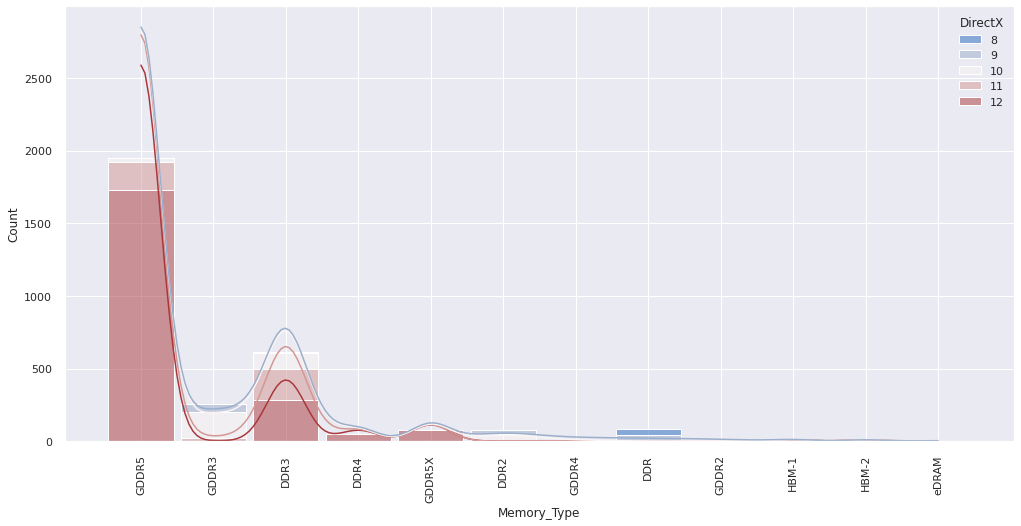

In [1265]:
sns.set(rc={'figure.figsize':(17,8)})
fig = sns.histplot(data=data[:3180], x="Memory_Type", hue="DirectX", multiple="stack", shrink=0.9, kde=True, bins=17, palette='vlag')
plt.xticks(rotation=90)
plt.show()

In [1266]:
Memory_Type = pd.get_dummies(data.Memory_Type)
new_data = pd.concat([new_data,Memory_Type],axis=1)

#### `Notebook_GPU`

In [1267]:
data.Notebook_GPU

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
3395    Yes
3396     No
3397     No
3398     No
3399     No
Name: Notebook_GPU, Length: 3400, dtype: object

In [1268]:
print('Total missing NaN dtypes:', data.Notebook_GPU.isna().sum()) # very similar to Dedicated

Total missing NaN dtypes: 0


In [1269]:
Notebook_GPU = pd.get_dummies(data.Notebook_GPU, drop_first=True)
Notebook_GPU.rename(columns={'Yes' : 'Notebook_GPU_val'},inplace=True)

new_data = pd.concat([new_data,Notebook_GPU],axis=1)

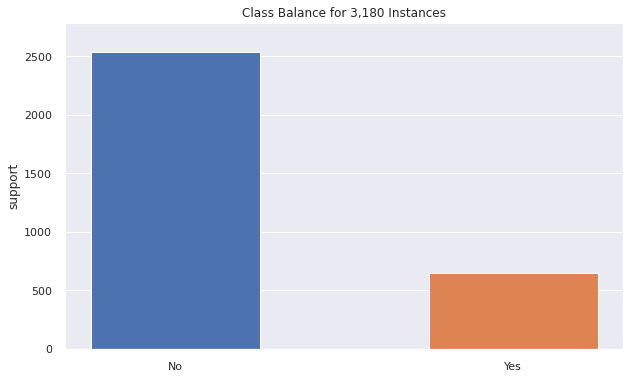

In [1270]:
sns.set_theme(rc={'figure.figsize':(10,6)})
class_balance(data.Notebook_GPU[:3180], labels=["No", "Yes"])
plt.show()

#### `PSU`

In [1271]:
data.PSU

0       350 Watt & 23 Amps
1                      NaN
2                      NaN
3       450 Watt & 24 Amps
4                      NaN
               ...        
3395                   NaN
3396                   NaN
3397                   NaN
3398    350 Watt & 18 Amps
3399                   NaN
Name: PSU, Length: 3400, dtype: object

In [1272]:
print('Total NaN values for PSU:',data.PSU.isna().sum())

Total NaN values for PSU: 1169


In [1273]:
def fixing_PSU(df,column):
    df = df[column].str.split(r'\s', expand=True)[[0,3]]
    df.rename(columns={0 : 'PSU_watts', 3 : 'PSU_amps'},inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

PSU = fixing_PSU(data,'PSU')
new_data = pd.concat([new_data, PSU],axis=1)

#### `Pixel_Rate`

In [1274]:
data.Pixel_Rate

0       40 GPixel/s
1               NaN
2       13 GPixel/s
3       27 GPixel/s
4        8 GPixel/s
           ...     
3395            NaN
3396            NaN
3397            NaN
3398            NaN
3399     2 GPixel/s
Name: Pixel_Rate, Length: 3400, dtype: object

In [1275]:
Pixel_Rate_NaN = data.Pixel_Rate.isna().sum()
print(f'Pixel_Rate has {Pixel_Rate_NaN} NaN values')

Pixel_Rate has 539 NaN values


In [1276]:
def fixing_Pixel_Rate(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Pixel_Rate_val'},inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

Pixel_Rate = fixing_Pixel_Rate(data,'Pixel_Rate')
new_data = pd.concat([new_data,Pixel_Rate],axis=1)

In [1277]:
Pixel_Rate.describe()

Pixel_Rate_val
count     3400.000000
mean        29.429412
std         35.813930
min          0.000000
25%          3.000000
50%         18.000000
75%         39.000000
max        260.000000

In [1278]:
Pixel_Rate[Pixel_Rate.Pixel_Rate_val > 200]

Pixel_Rate_val
5                207
20               248
142              248
236              233
961              260
1356             246
1835             207
2045             222
2517             253
2787             209
2877             233
3027             228
3146             253

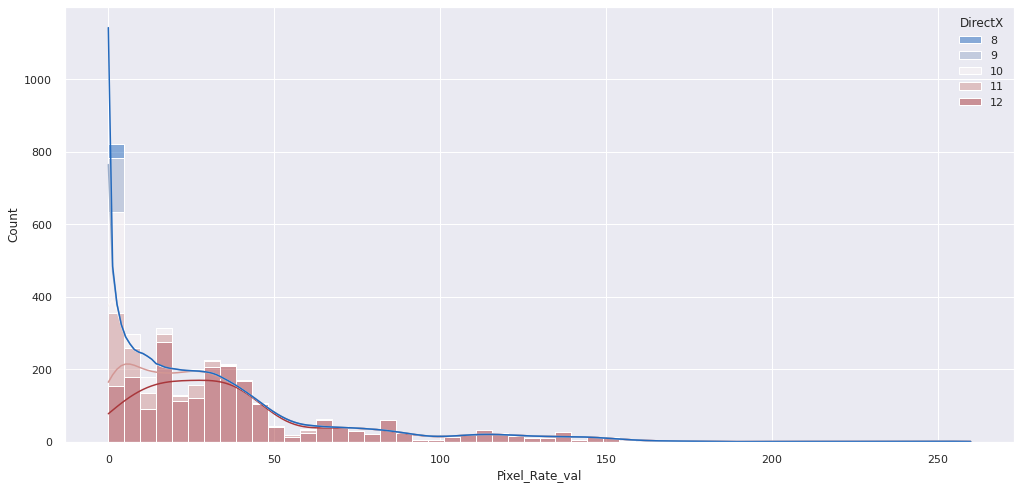

In [1279]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Pixel_Rate_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Power_Connector` 

In [1280]:
data.Power_Connector

0       None 
1         NaN
2         NaN
3       None 
4         NaN
        ...  
3395      NaN
3396    None 
3397    None 
3398    None 
3399    None 
Name: Power_Connector, Length: 3400, dtype: object

In [1281]:
print('Actual NaN values:', data.Power_Connector.isna().sum())

Actual NaN values: 706


In [1282]:
data.Power_Connector.unique()

array(['None ', nan, '1x 6-pin ', '2x 6-pin ', '1x 8-pin ',
       '1x 6-pin + 1x 8-pin ', '2x 8-pin ', '3x 8-pin ', '4x 6-pin ',
       'None  ', '1x 6-pin + 1x 8-pin\t ', '2x 6-pin  '], dtype=object)

In [1283]:
def fixing_Power_Connector(df,col):
    index_None = df.loc[(df[col] == 'None  ') | (df[col] == 'None ')].index
    df[col].iloc[index_None] = '0' # None 
    
    df[col].fillna('-1', inplace=True) # NaN

    index_Repeated = df.loc[ df[col] == '1x 6-pin + 1x 8-pin\t ' ].index
    df[col].iloc[index_Repeated] = '1x 6-pin + 1x 8-pin ' # 1 repeated value

    df[col].rename('Power_Connector_val',inplace=True)

    return df[col]


Power_Connector = fixing_Power_Connector(data,'Power_Connector')

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [1284]:
Power_Connector.value_counts()

0                       1651
-1                       706
1x 6-pin                 341
2x 6-pin                 251
1x 6-pin + 1x 8-pin      201
1x 8-pin                 154
2x 8-pin                  81
3x 8-pin                   8
4x 6-pin                   5
2x 6-pin                   2
Name: Power_Connector_val, dtype: int64

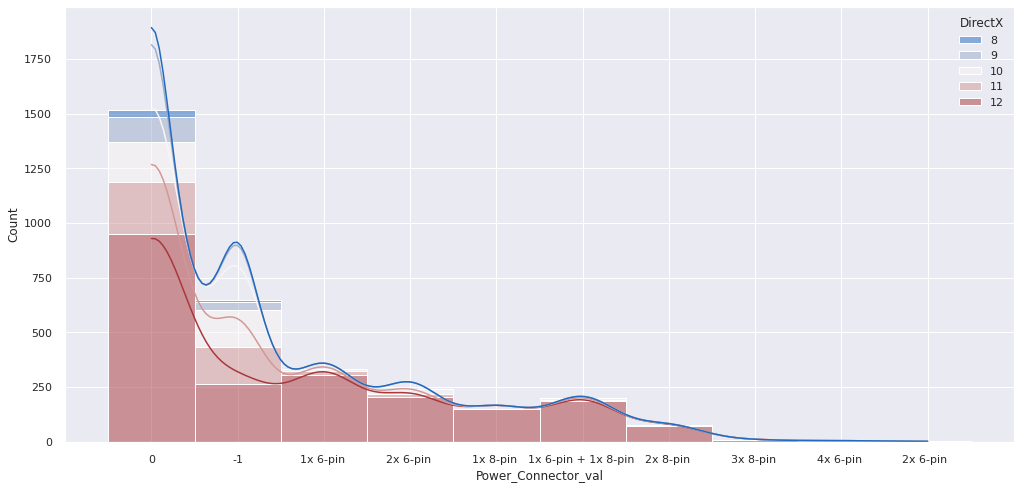

In [1285]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=pd.concat([new_data,Power_Connector],axis=1)[:3180], x="Power_Connector_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

In [1286]:
enc = OrdinalEncoder(dtype=int)
Power_Connector_transf = enc.fit_transform(pd.DataFrame(Power_Connector))
Power_Connector = pd.DataFrame(Power_Connector_transf,columns=['Power_Connector_val'])
new_data = pd.concat([new_data,Power_Connector],axis=1)

In [1287]:
Power_Connector.value_counts()

Power_Connector_val
1                      1651
0                       706
2                       341
5                       251
3                       201
4                       154
7                        81
8                         8
9                         5
6                         2
dtype: int64

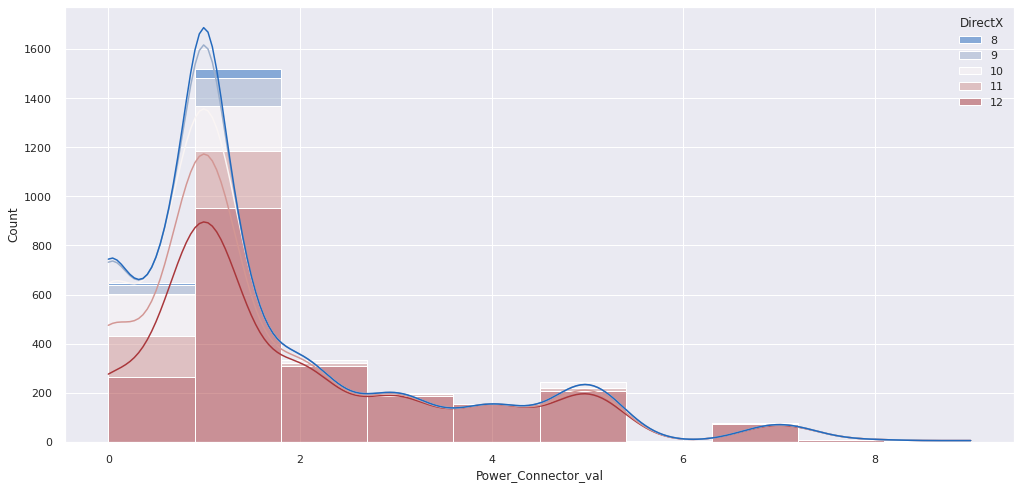

In [1288]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Power_Connector_val", hue='DirectX', multiple="stack", kde=True, palette='vlag',bins=10) 
plt.show()

#### `Process`

In [1289]:
data.Process

0       28nm
1        NaN
2       28nm
3       28nm
4       28nm
        ... 
3395     NaN
3396     NaN
3397     NaN
3398     NaN
3399    80nm
Name: Process, Length: 3400, dtype: object

In [1290]:
print('Actual NaN values:', data.Process.isna().sum())

Actual NaN values: 458


In [1291]:
data.Process.value_counts()

28nm     1490
40nm      620
14nm      310
16nm      205
55nm      109
65nm       61
80nm       45
22nm       40
32nm       24
90nm       15
150nm      12
130nm       6
110nm       4
100nm       1
Name: Process, dtype: int64

In [1292]:
def fixing_Process(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Process_val'},inplace=True)

    df.fillna(0,inplace=True) 
    df = df.astype(int)

    return df

Process = fixing_Process(data,'Process')
new_data = pd.concat([new_data,Process],axis=1)

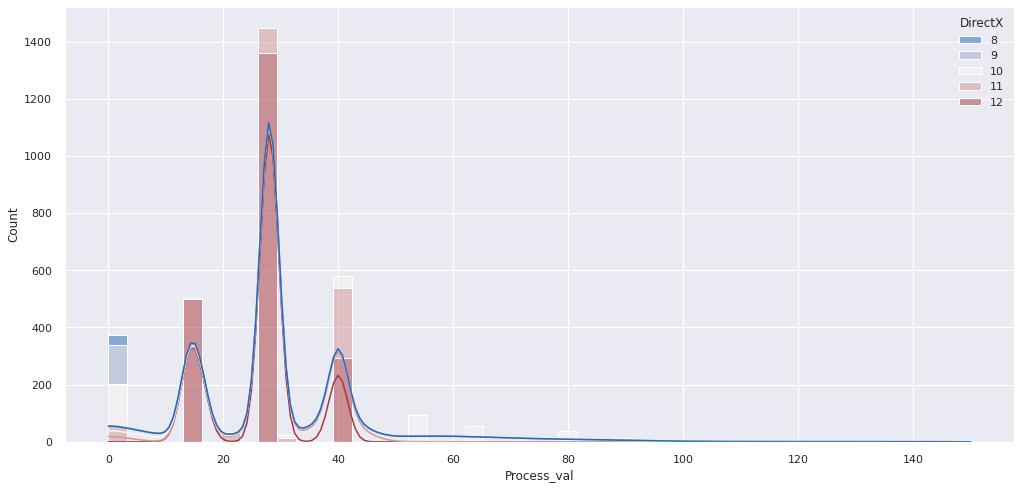

In [1293]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Process_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `ROPs` [AINDA FALTA]

In [1294]:
data.ROPs

0        32
1       NaN
2        16
3        24
4         8
       ... 
3395    NaN
3396    NaN
3397    NaN
3398    NaN
3399      4
Name: ROPs, Length: 3400, dtype: object

In [1295]:
data.ROPs.unique()

array(['32', nan, '16', '24', '8', '96 (x2)', '2', '64 (x2)', '56', '64',
       '4', '6', '32 (x2)', '16 (x2)', '22 (x4)', '48', '20', '88', '1',
       '28', '96', '56 (x2)', '8 (x2)', '40 (x2)', '64 (x3)', '128',
       '16 (x4)', '32 (x4)', '48 (x2)', '12', '40', '24 (x2)', '28 (x2)',
       '3', '48 (x3)', '24 (x3)', '32 (x3)', '48 (x4)', '14 (x2)',
       '44 (x2)', '4 (x4)', '24 (x4)', '22'], dtype=object)

#### `Resolution_WxH`

In [1296]:
data.Resolution_WxH

0       5120x3200
1       2560x1600
2       4096x2160
3       4096x2160
4       4096x2160
          ...    
3395    2560x1600
3396          NaN
3397          NaN
3398    2560x1600
3399    1920x1440
Name: Resolution_WxH, Length: 3400, dtype: object

In [1297]:
print('Actual NaN values:', data.Resolution_WxH.isna().sum())

Actual NaN values: 192


In [1298]:
data.Resolution_WxH.value_counts()

4096x2160    1330
2560x1600    1172
7680x4320     258
5120x3200     217
2048x1536      85
5120x2880      48
4096x2304      41
1600x1200      28
7680x3200       6
4096x3112       5
1280x1024       3
1920x1440       3
3840x2160       3
1600x900        2
1920x1200       2
1680x1050       1
5120x2160       1
5760x2160       1
3840x2400       1
1600x1280       1
Name: Resolution_WxH, dtype: int64

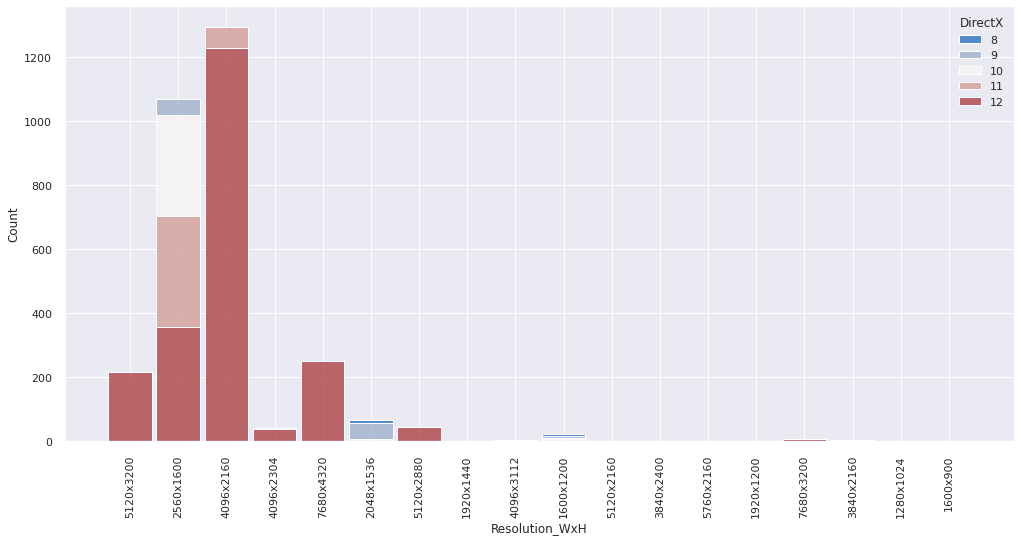

In [1299]:
sns.set(rc={'figure.figsize':(17,8)})
fig = sns.histplot(data=data[:3180], x="Resolution_WxH", hue="DirectX", multiple="stack", shrink=0.9, bins=17, palette='vlag')
plt.xticks(rotation=90)
plt.show()

In [1300]:
dsp_index = data.loc[data['Resolution_WxH'].map(data['Resolution_WxH'].value_counts()) < 20].Resolution_WxH.index
data.Resolution_WxH.iloc[dsp_index] = 'disposable'

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [1301]:
data.Resolution_WxH.value_counts()

4096x2160     1330
2560x1600     1172
7680x4320      258
5120x3200      217
2048x1536       85
5120x2880       48
4096x2304       41
disposable      29
1600x1200       28
Name: Resolution_WxH, dtype: int64

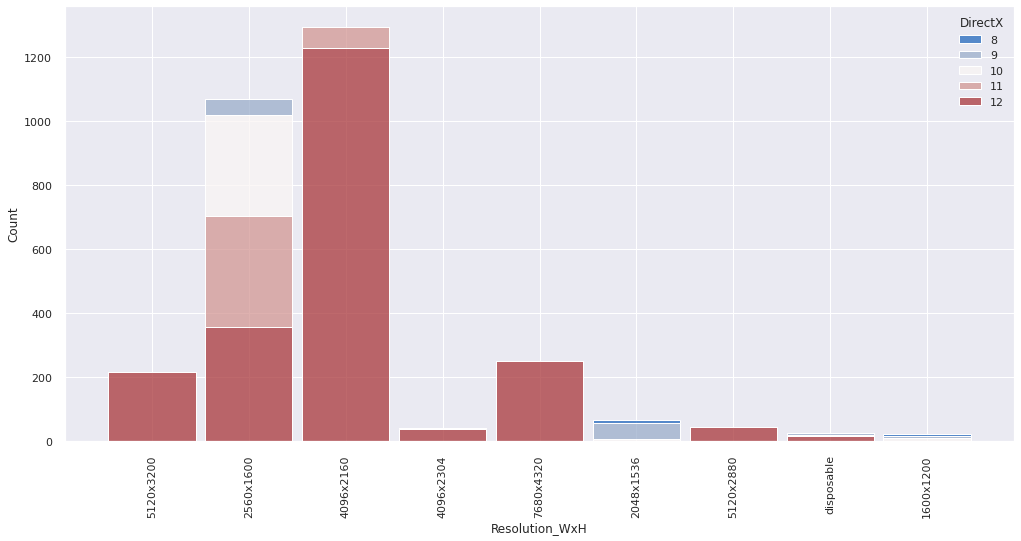

In [1302]:
sns.set(rc={'figure.figsize':(17,8)})
fig = sns.histplot(data=data[:3180], x="Resolution_WxH", hue="DirectX", multiple="stack", shrink=0.9, bins=17, palette='vlag')
plt.xticks(rotation=90)
plt.show()

In [1303]:
Resolution_WxH = pd.get_dummies(data.Resolution_WxH,drop_first=True)
new_data = pd.concat([new_data,Resolution_WxH],axis=1)

#### `SLI_Crossfire`

In [1304]:
data.SLI_Crossfire

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
3395     No
3396     No
3397     No
3398    Yes
3399    Yes
Name: SLI_Crossfire, Length: 3400, dtype: object

In [1305]:
print('Total missing NaN dtypes:', data.SLI_Crossfire.isna().sum()) 

Total missing NaN dtypes: 0


In [1306]:
def fixing_SLI_Crossfire(df,column):
    df = pd.DataFrame(df[column])
    df.fillna('No', inplace=True)

    encoder = OneHotEncoder(drop="first",sparse=False)
    df["SLI_Crossfire_val"] = encoder.fit_transform(df)

    return df["SLI_Crossfire_val"]

SLI_Crossfire = fixing_SLI_Crossfire(data,'SLI_Crossfire')
new_data = pd.concat([new_data,SLI_Crossfire],axis=1)

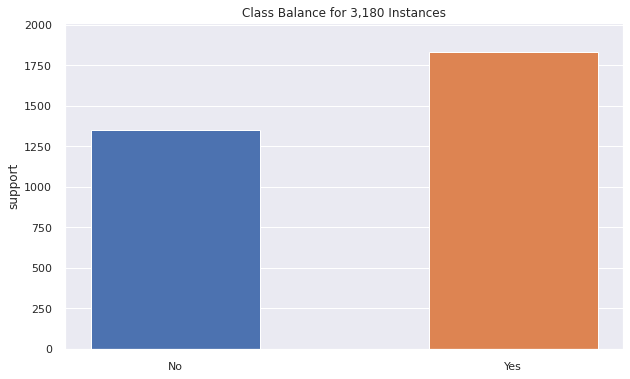

In [1307]:
sns.set_theme(rc={'figure.figsize':(10,6)})
class_balance(SLI_Crossfire[:3180], labels=["No", "Yes"])
plt.show()

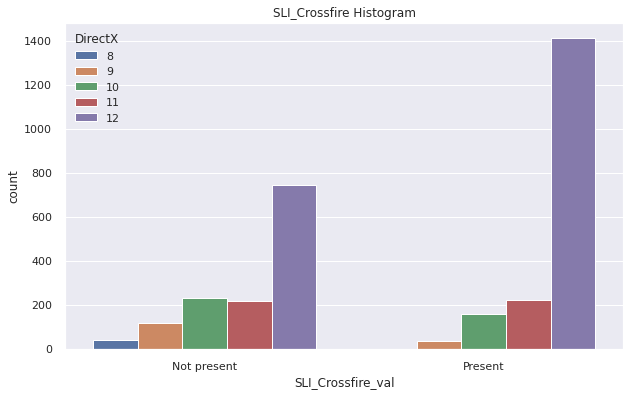

In [1308]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data=new_data[:3180], x="SLI_Crossfire_val", hue='DirectX') #[:3180]
plt.title("SLI_Crossfire Histogram")
plt.xticks([0,1],['Not present','Present'])
plt.show()

#### `Shader` [Maybe use ordinal encoding, but it can keep as it is]

In [1309]:
data.Shader

0       5.0
1       4.0
2       5.0
3       5.0
4       5.0
       ... 
3395    NaN
3396    2.0
3397    3.0
3398    3.0
3399    4.0
Name: Shader, Length: 3400, dtype: float64

In [1310]:
print('Total missing NaN dtypes:', data.Shader.isna().sum()) 

Total missing NaN dtypes: 103


In [1311]:
data.Shader.value_counts()

5.0    2646
4.0     263
4.1     159
3.0     144
2.0      57
1.3      14
1.4       9
1.1       4
1.0       1
Name: Shader, dtype: int64

In [1312]:
Shader_val = data.Shader.rename('Shader_val')
Shader_val.fillna(0,inplace=True)

In [1313]:
new_data = pd.concat([new_data,Shader_val],axis=1)

#### `TMUs`

In [1314]:
data.TMUs

0       48.0
1        NaN
2       32.0
3       80.0
4       32.0
        ... 
3395     NaN
3396     NaN
3397     NaN
3398     NaN
3399     8.0
Name: TMUs, Length: 3400, dtype: float64

In [1315]:
print('Total missing NaN dtypes:', data.TMUs.isna().sum()) 

Total missing NaN dtypes: 533


In [1316]:
data.TMUs.unique()

array([ 48.,  nan,  32.,  80., 176.,   8.,  40., 192., 112.,   4., 104.,
       128.,  56.,  24., 160., 120.,  96.,  16.,  20., 144.,   2.,  72.,
       224.,  64.,   1., 256., 240.,  36., 320.,  60.,  88.,  44.,  28.,
       384.,  12.,  14., 106.])

In [1317]:
def fixing_TMUs(df,column):
    df = df[column]#.str.extract(r'^(\d+)')
    df.rename('TMUs_val',inplace=True)

    df.fillna(-1,inplace=True) 
    df = df.astype(int)

    return df

TMUs = fixing_TMUs(data,'TMUs')
new_data = pd.concat([new_data,TMUs], axis=1)

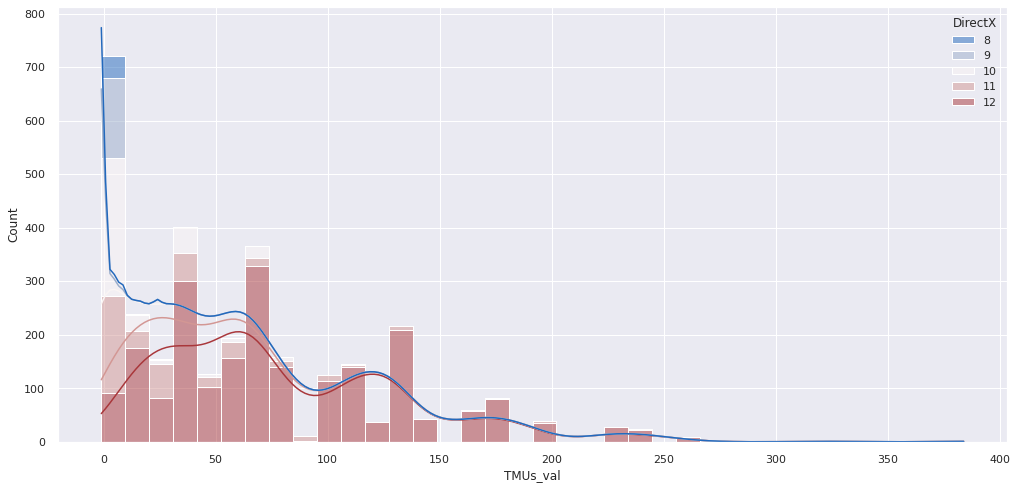

In [1318]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="TMUs_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `Texture_Rate`

In [1319]:
data.Texture_Rate

0       60 GTexel/s
1               NaN
2       26 GTexel/s
3       89 GTexel/s
4       31 GTexel/s
           ...     
3395            NaN
3396            NaN
3397            NaN
3398            NaN
3399     4 GTexel/s
Name: Texture_Rate, Length: 3400, dtype: object

In [1320]:
print('Total missing NaN dtypes:', data.Texture_Rate.isna().sum()) 

Total missing NaN dtypes: 539


In [1321]:
def fixing_Texture_Rate(df,column):
    df = df[column].str.extract(r'^(\d+)')
    df.rename(columns={0 : 'Texture_Rate_val'},inplace=True)

    df.fillna(-1,inplace=True) 
    df = df.astype(int)

    return df

Texture_Rate = fixing_Texture_Rate(data,'Texture_Rate')
new_data = pd.concat([new_data,Texture_Rate],axis=1)

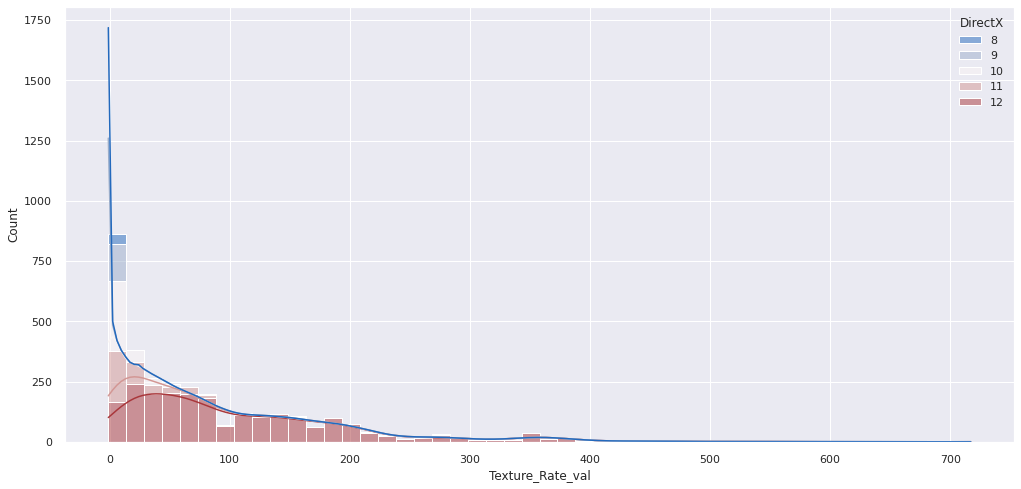

In [1322]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="Texture_Rate_val", hue='DirectX', multiple="stack", kde=True, palette='vlag') 
plt.show()

#### `VGA_Connection`

In [1323]:
data.VGA_Connection

0       0.0
1       NaN
2       NaN
3       0.0
4       NaN
       ... 
3395    NaN
3396    0.0
3397    1.0
3398    1.0
3399    1.0
Name: VGA_Connection, Length: 3400, dtype: float64

In [1324]:
data.VGA_Connection.unique()

array([ 0., nan,  1.,  2.,  4.])

In [1325]:
data.VGA_Connection.value_counts()

0.0    2086
1.0     543
2.0      14
4.0       2
Name: VGA_Connection, dtype: int64

In [1326]:
print('Total missing NaN dtypes:', data.VGA_Connection.isna().sum()) 

Total missing NaN dtypes: 755


In [1333]:
def fixing_VGA_Connection(df,column):
    df = df[column]#.str.extract(r'^(\d+)')
    df.rename('VGA_Connection_val',inplace=True)

    df.fillna(-1,inplace=True) 
    df = df.astype(int)

    return df

VGA_Connection = fixing_VGA_Connection(data,'VGA_Connection')
new_data = pd.concat([new_data,VGA_Connection], axis=1)

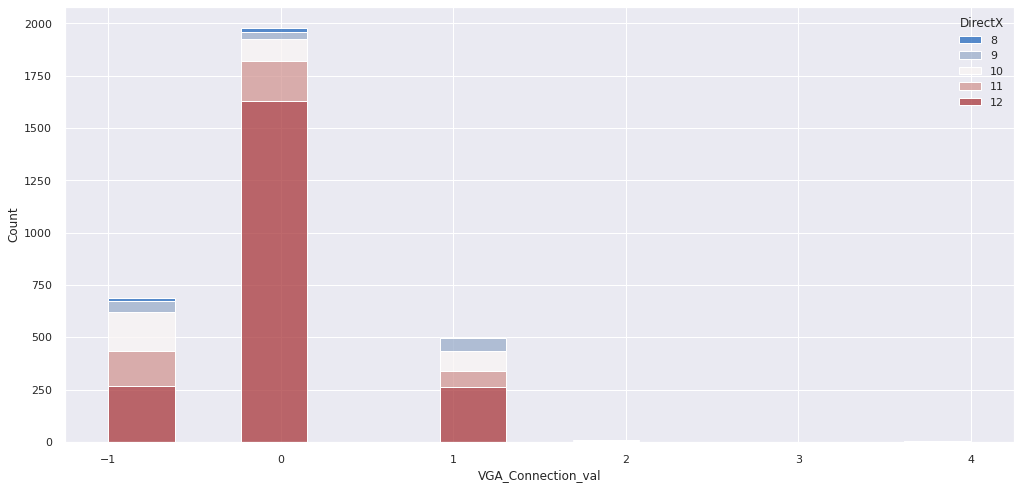

In [1335]:
sns.set_theme(rc={'figure.figsize':(17,8)})
sns.histplot(data=new_data[:3180], x="VGA_Connection_val", hue='DirectX', multiple="stack", palette='vlag') 
plt.show()

## Saving and Reading Preprocessed Data

#### `Saving`

In [1383]:
all_data = pd.concat([new_data[['Nome','DirectX']],new_data.iloc[:,30:]],axis=1)
transf_df = all_data.iloc[:3180]
transf_sub = all_data.iloc[3180:].drop(columns=['DirectX'])

In [1384]:
transf_df.to_csv(os.path.join('data', 'transf_df.csv'), index=False) 
transf_sub.to_csv(os.path.join('data', 'transf_sub.csv'), index=False) 

#### `Reading`

In [1993]:
transf_df = pd.read_csv(os.path.join('data','transf_df.csv'))
transf_sub = pd.read_csv(os.path.join('data','transf_sub.csv'))

transf_data = pd.concat([transf_df,transf_sub],axis=0,ignore_index=True)

## Feature Engineering and Selection

<AxesSubplot:>

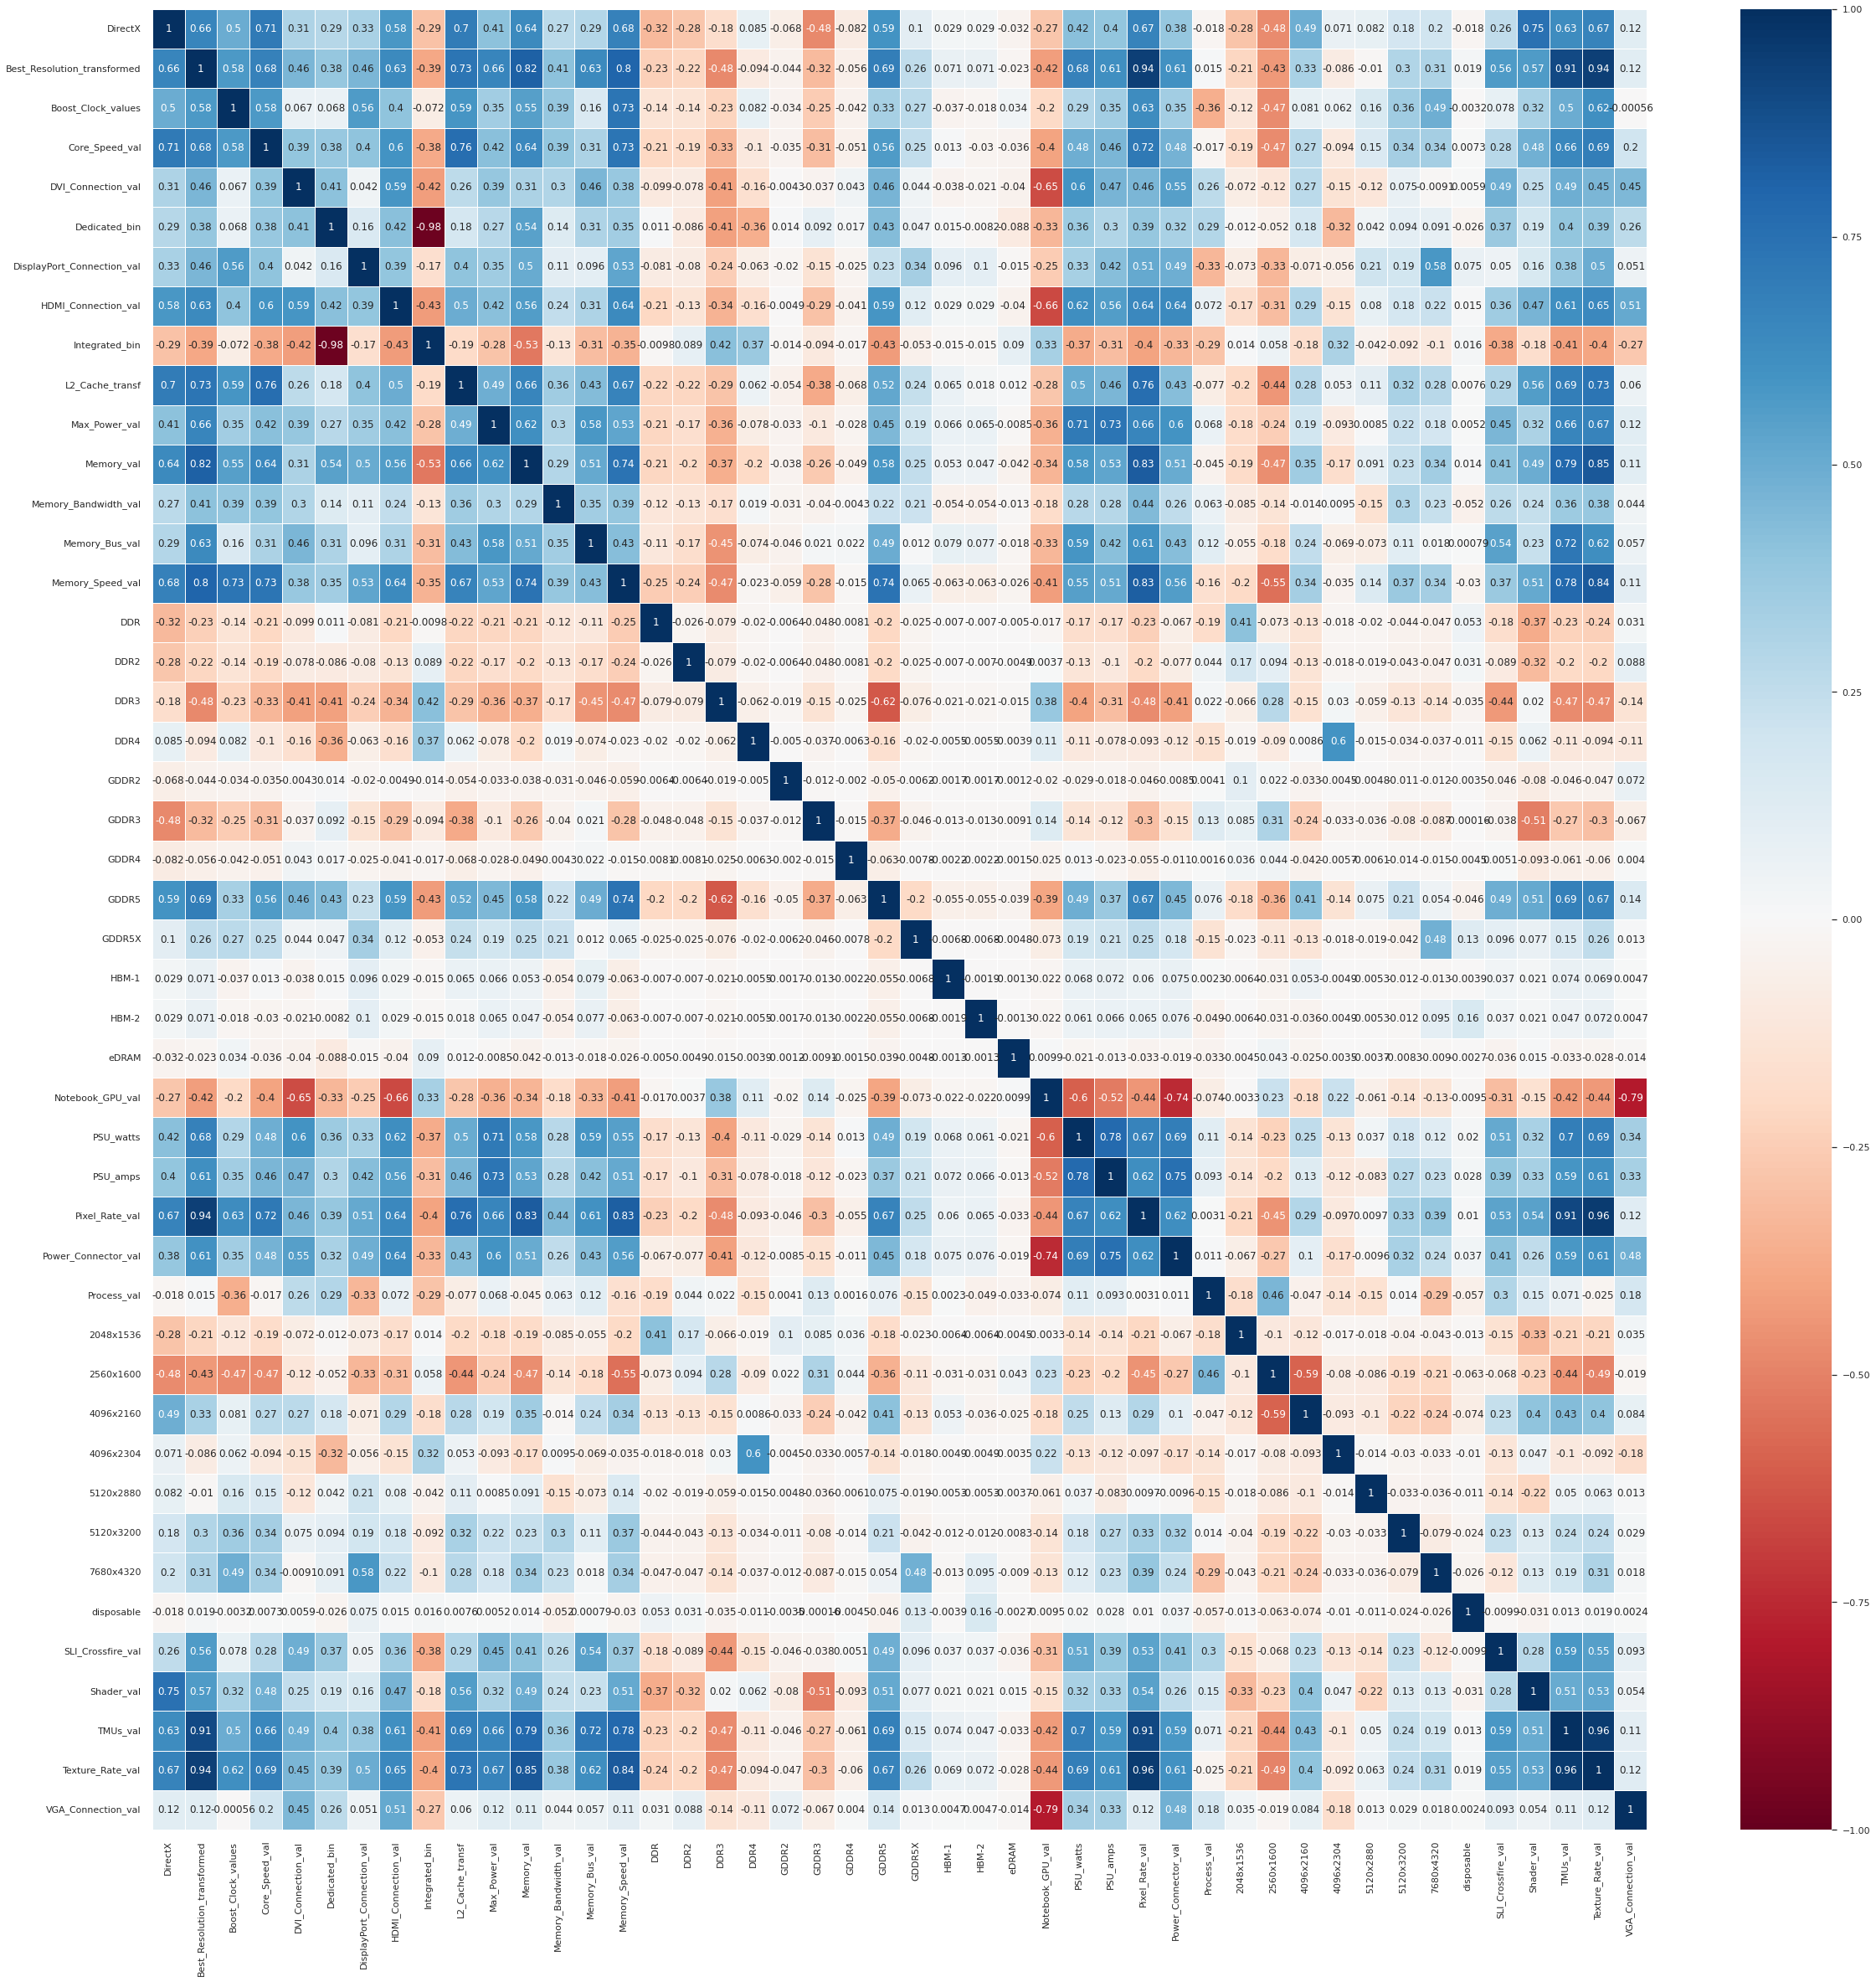

In [1572]:
plt.rcParams["figure.figsize"] = [40, 40]
sns.heatmap(transf_df.corr(method='spearman'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

In [1573]:
correlation_matrix = transf_df.corr(method='spearman')
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 :
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

list(correlated_features)

['Integrated_bin',
 'Pixel_Rate_val',
 'Texture_Rate_val',
 'Memory_val',
 'TMUs_val']

<AxesSubplot:>

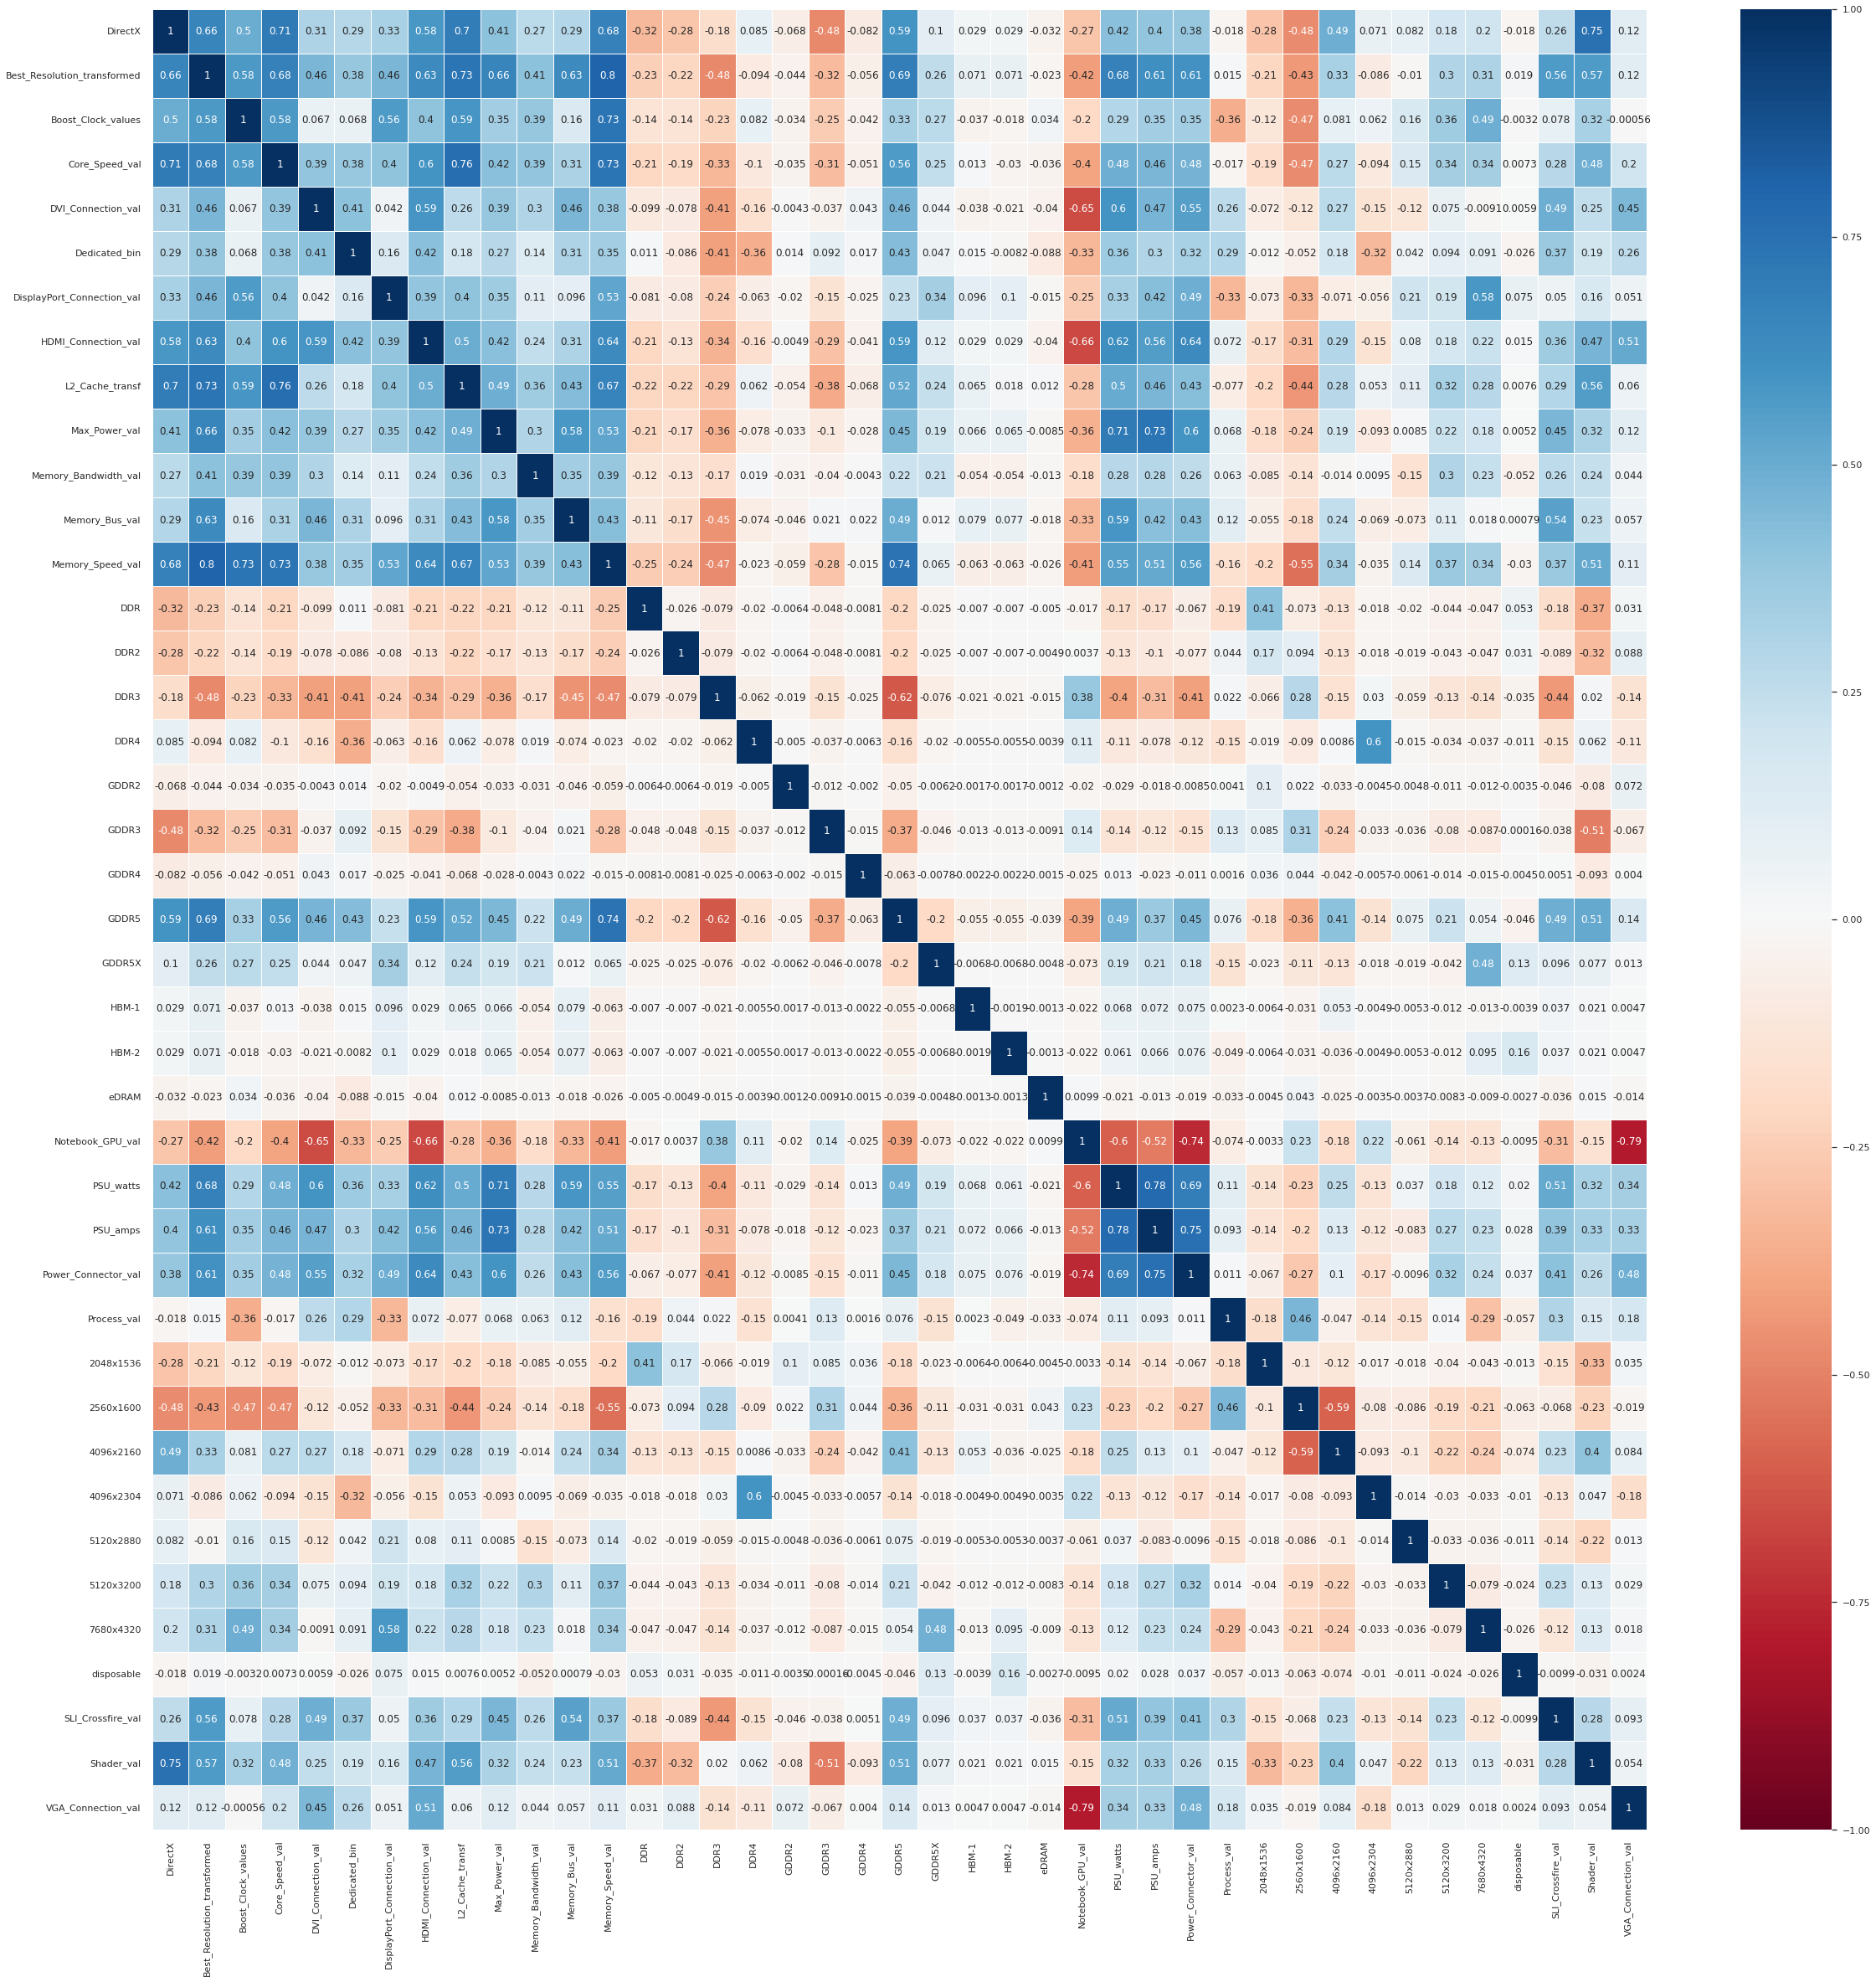

In [1574]:
# transf_df.drop(columns=list(correlated_features))

plt.rcParams["figure.figsize"] = [40, 40]
sns.heatmap(transf_df.drop(columns=list(correlated_features)).corr(method='spearman'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

In [1575]:
# transf_df.drop(labels=correlated_features, axis=1, inplace=True)
# transf_sub.drop(labels=correlated_features, axis=1, inplace=True)

<AxesSubplot:>

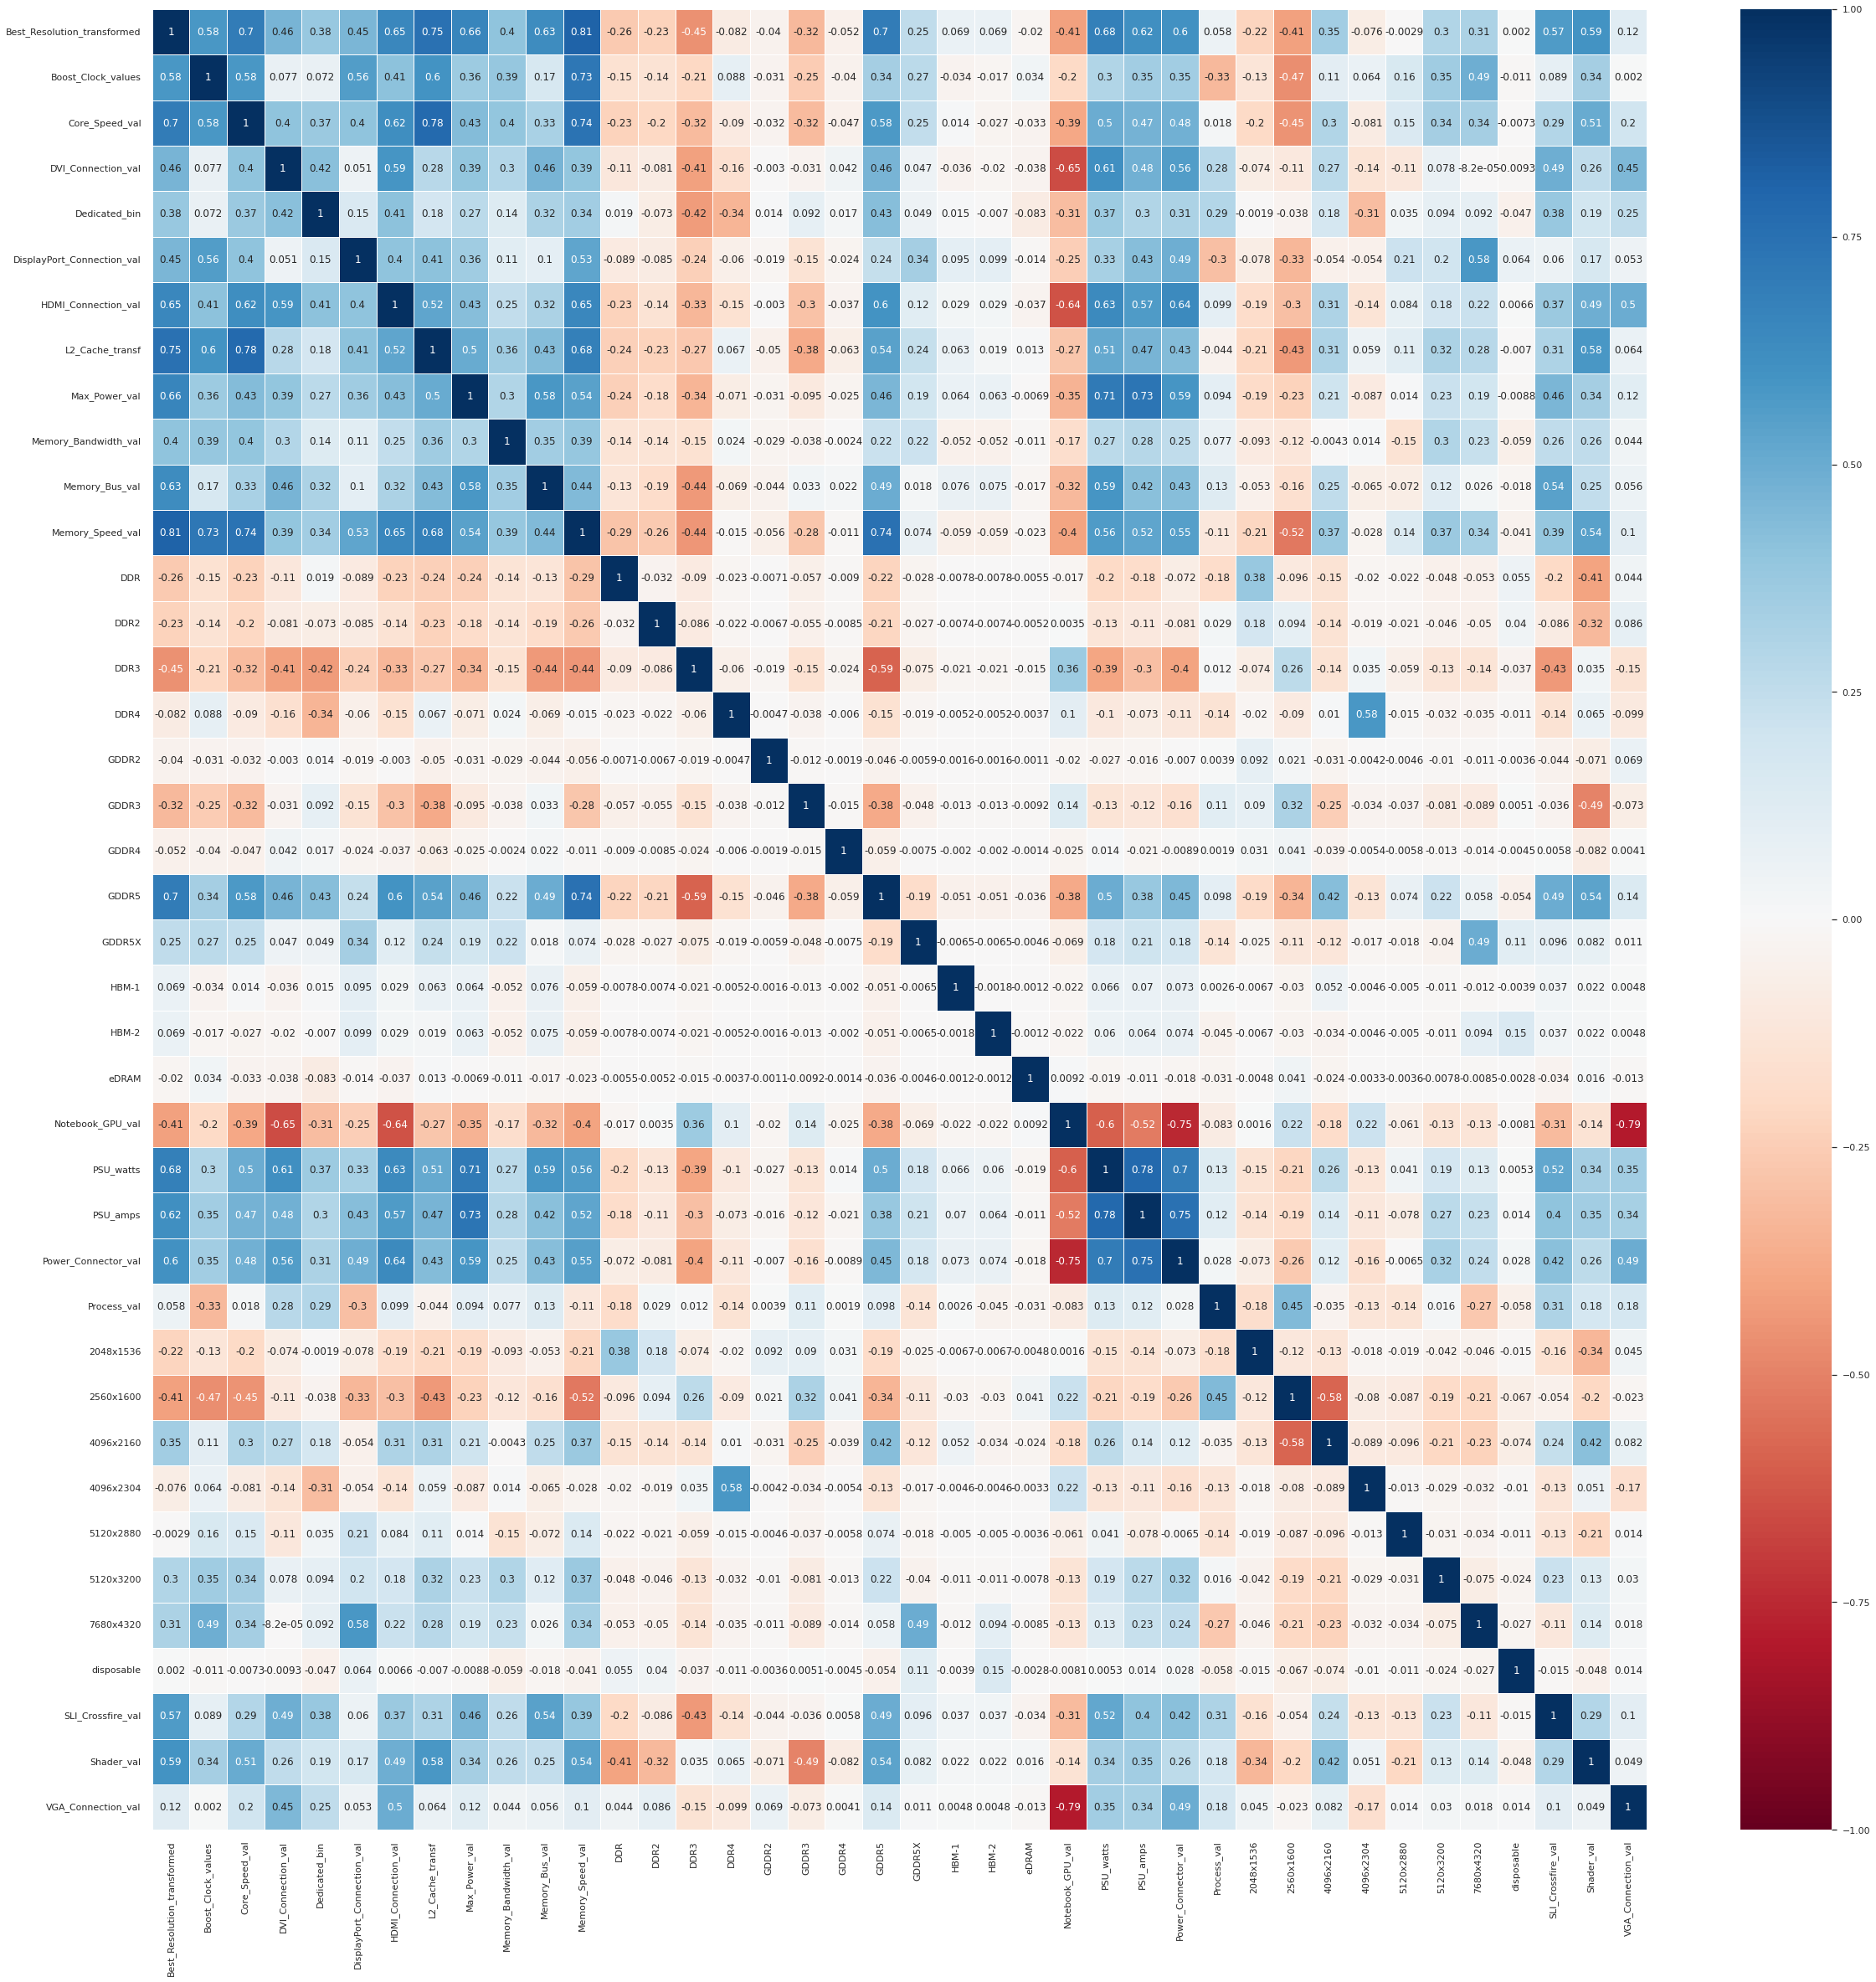

In [1576]:
corr_d = list(correlated_features)
corr_d.append('DirectX')

plt.rcParams["figure.figsize"] = [40, 40]
sns.heatmap(transf_data.drop(columns=corr_d).corr(method='spearman'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='RdBu',annot=True)

## Prediction Models [X_norm not normalized]

In [1577]:
X_norm, y = transf_df.drop(columns=['Nome','DirectX']), transf_df.DirectX

In [1578]:
seed = np.random.randint(low=0, high=100)

# Divisões no Cros validate
CV = 7

# DataFrame para salvar o desempenho dos modelos
models_default = pd.DataFrame()

In [1579]:
lr = LogisticRegression(random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
svc = SVC(random_state=seed)
knn = KNeighborsClassifier()

models = [lr, dt, rf, svc, knn]

xgb = XGBClassifier(random_state=seed)

In [1580]:
def testing_models(models, df_features, df_target, CV):
    result_models = pd.DataFrame()
    
    for model in models:
        # Cross Validation
        result_models[type(model).__name__] = cross_val_score(model, df_features, df_target, cv=CV)
    
    return result_models

def testing_XGB(xgb, df_features, df_target, CV):
    global seed
    kf = KFold(n_splits=CV, shuffle=True, random_state=seed)
    score_xgb = []
    for train_index, test_index in kf.split(X_norm):

        X_train, X_test = X_norm.iloc[train_index], X_norm.iloc[test_index]
        y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
        xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)
        score_xgb.append(xgb.score(X_test, y_test))

    return score_xgb

In [1581]:
def comparing_models(df):
    return pd.concat([df.mean(), df.var()], axis=1).rename(columns={0:"Mean", 1:"std"}).sort_values(by=["Mean", "std"], ascending=[False, False]).style.background_gradient(subset=["Mean", "std"])

In [1582]:
models_default = testing_models(models, X_norm, y, CV)

oe = OrdinalEncoder(dtype=int)
y_transf = pd.DataFrame(oe.fit_transform(pd.DataFrame(y)))

models_default["XGBoost"] = testing_XGB(xgb, X_norm, y_transf, CV)

In [1583]:
comparing_models(models_default)

In [1586]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
           

clf = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=-1)

clf.fit(X_norm,y_transf)

KeyboardInterrupt: 

In [1587]:
param_grid = {
    'n_estimators' : list(range(50,300,20)),
    'max_depth' : [3,5,7],
    'max_features' : [1,2],
    'criterion' : ["gini", "entropy", "log_loss"]
    }

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=True, n_jobs=-1, scoring='accuracy') 
clf.fit(X_norm, y) 

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7], 'max_features': [1, 2],
                         'n_estimators': [50, 70, 90, 110, 130, 150, 170, 190,
                                          210, 230, 250, 270, 290]},
             scoring='accuracy', verbose=True)

In [1599]:
print("\n The best parameters across ALL searched params:\n",clf.best_params_)


 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'n_estimators': 250}


## Neural Networks Model Classifier

In [1994]:
X, y = transf_df.drop(columns=['Nome','DirectX']), transf_df.DirectX

from keras.utils import np_utils
from keras import layers
from keras import models
import tensorflow as tf
from keras.utils import np_utils
from scikeras.wrappers import KerasClassifier
from numpy import argmax
from keras import regularizers

# encode class values as integers
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)


random_seed = np.random.randint(low=0,high=100)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, random_state=random_seed, test_size=0.2, shuffle=True)

In [1995]:
# validação
val_cut = 2290

partial_X_train = X_train[:val_cut]
x_val = X_train[val_cut:]

partial_y_train = y_train[:val_cut]
y_val = y_train[val_cut:]

In [2027]:
# Defining baseline model

from keras import optimizers

# optimizers.RMSprop(lr=0.0001)

def baseline_model():
	# Create model
	model = models.Sequential()
	model.add(layers.Dense(16, input_dim=45, activation=layers.LeakyReLU(alpha=0.1))) #'relu'
	model.add(layers.BatchNormalization())
	# model.add(layers.Dropout(0.5))
	model.add(layers.Dense(16, activation=layers.LeakyReLU(alpha=0.1)))
	model.add(layers.BatchNormalization())
	# model.add(layers.Dropout(0.5))
	model.add(layers.Dense(5, activation='softmax')) # sigmoid, relu, softmax
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adadelta , rmsprop, adam->melhor
	return model

model = baseline_model()

In [2040]:
history = model.fit(partial_X_train,
partial_y_train,
epochs=300, 
#300 FOI O TOP! accuracy: 0.9670
#200 foi accuracy: 0.9717 com batch_size = 50
batch_size=50,
validation_data=(x_val, y_val))

Epoch 1/300
46/46 [==============================] - 1s 12ms/step - loss: 0.1263 - accuracy: 0.9546 - val_loss: 0.1299 - val_accuracy: 0.9528
Epoch 2/300
46/46 [==============================] - 0s 10ms/step - loss: 0.1130 - accuracy: 0.9642 - val_loss: 0.1267 - val_accuracy: 0.9606
Epoch 3/300
46/46 [==============================] - 0s 11ms/step - loss: 0.1035 - accuracy: 0.9690 - val_loss: 0.1163 - val_accuracy: 0.9646
Epoch 4/300
46/46 [==============================] - 0s 9ms/step - loss: 0.1038 - accuracy: 0.9620 - val_loss: 0.1145 - val_accuracy: 0.9685
Epoch 5/300
46/46 [==============================] - 0s 9ms/step - loss: 0.0961 - accuracy: 0.9703 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 6/300
46/46 [==============================] - 0s 9ms/step - loss: 0.0989 - accuracy: 0.9672 - val_loss: 0.1030 - val_accuracy: 0.9646
Epoch 7/300
46/46 [==============================] - 0s 9ms/step - loss: 0.0963 - accuracy: 0.9699 - val_loss: 0.1014 - val_accuracy: 0.9685
Epoch 8/30

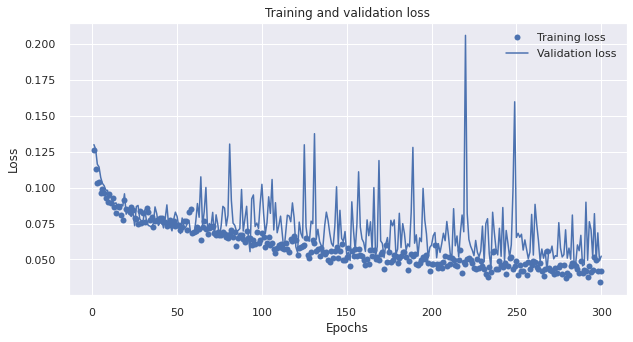

In [2042]:
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

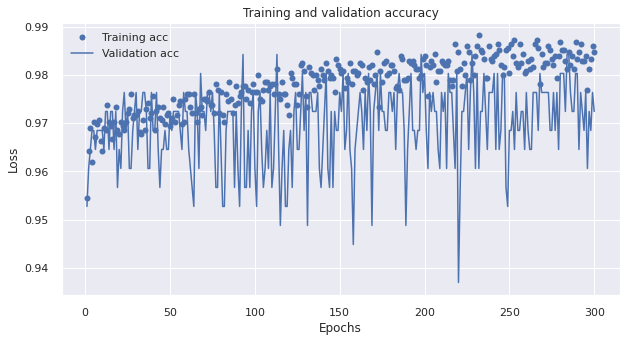

In [2043]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2044]:
results = model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9780


In [2001]:
y_pred = model.predict(transf_sub.drop(columns=['Nome'])) #,'DirectX'

7/7 [==============================] - 1s 2ms/step


In [1858]:
y_pred

array([[6.3760825e-14, 7.4923298e-13, 7.9741701e-14, 2.8253983e-06,
        9.9999708e-01],
       [2.2879149e-21, 7.4058845e-19, 6.8985067e-14, 4.1722649e-07,
        9.9999958e-01],
       [2.3595659e-12, 1.2837947e-11, 2.3775937e-10, 6.2128775e-06,
        9.9999374e-01],
       ...,
       [6.4961081e-09, 9.9728537e-01, 2.7146214e-03, 3.2304655e-11,
        4.7791035e-14],
       [4.2427615e-05, 4.1537651e-01, 5.8457494e-01, 6.0547482e-06,
        3.0671021e-09],
       [6.0255607e-12, 4.6106666e-06, 9.9879140e-01, 1.2008848e-03,
        3.1370282e-06]], dtype=float32)

In [1859]:
y_pred = argmax(y_pred,axis=1)
y_pred = encoder.inverse_transform(y_pred)
y_pred

array([12, 12, 12,  9, 12, 11, 11, 12, 11, 10, 12, 10, 11, 10, 11, 12, 12,
        9, 12,  9, 10,  9, 12, 12, 10, 12, 10, 12,  9,  9, 10, 10, 10, 10,
        9,  8, 10, 12, 12, 11,  9, 11, 12, 11, 10,  9, 10, 12, 11, 11, 10,
       11,  8, 12, 12, 12, 10, 11,  9,  8, 10,  9, 12, 10,  9, 10,  8, 11,
       11,  9, 12, 11,  9,  8, 12,  8, 10, 10, 10, 11,  8,  8, 11, 11,  9,
       11, 12, 11,  9, 10, 12, 11,  9, 12, 12,  8, 10,  8, 12, 10, 10, 11,
       10,  9, 11,  9, 12, 10, 10,  8, 12, 10, 10, 11, 11, 11, 11, 12,  9,
        8, 10, 11, 10,  9, 12, 12, 10,  9, 10, 12, 12, 11,  9,  9,  9, 10,
        8, 12, 12,  9, 12, 10, 12, 12, 12, 11, 11, 11, 12, 10, 11, 10, 11,
        8,  9, 11, 10,  8, 11,  9,  9, 12, 12, 11, 12,  9,  9,  9, 11,  9,
       12,  9, 11, 11,  9,  9,  9,  9,  9, 10, 12, 12, 10, 11, 12, 12, 10,
       11, 12, 11,  8, 10,  9, 10, 10, 12, 10, 10, 11, 12,  9, 12, 10, 10,
       10, 10,  8,  9, 10,  9, 10, 11,  8, 10, 11, 10,  9,  9, 10, 10])

## Submission

In [1591]:
# y_pred = clf.predict(transf_sub.drop(columns=['Nome']))

In [1860]:
transf_sub['DirectX'] = y_pred

In [1862]:
transf_sub[['Nome','DirectX']].to_csv(os.path.join('submissions', 'sub6_out_v2.csv'),index=False)

## Rascunho e observações

Dropout e Batch Normalization 

In [1329]:
# # values = df.Boost_Clock[df.Boost_Clock.notna()].apply(lambda x: str(x))
# # type(values.values[2])

# def anti_filter(column,partial_str):
#     """
#     This function only filter values from `column` that
#     do not contain values from `partial_str`
#     """

#     values = column[column.notna()].apply(lambda x: str(x)).values

#     return [x for x in values if all(y in x for y in partial_str)] # not --> is optional

# not_MHz_values = anti_filter(df.L2_Cache, ['(x'])

# print("Boost_Clock not MHz values:", not_MHz_values)7

# from collections import Counter

# def select_ocurrence(list,sep,occurrence):
#     """
#     sep : character of occurrence in a string
#     ocurrence : 0 for pre-occurrence, 2 for post-occurrence
#     """

#     list = [str(x) for x in list]

#     return [x.partition(sep)[occurrence][1] for x in list] 



# spo_list = select_ocurrence(not_MHz_values,'(', 2)

# pd.DataFrame(Counter(spo_list),index=[0]) 


mudando pela media da idade baseada na pclass e sex

In [1330]:
# for sex, pclass in [(sex, pclass) for sex in train.Sex.unique() for pclass in train.Pclass.unique()]:
#     condition = (train.Sex == sex) & (train.Pclass == pclass)
#     age_mean = train.loc[condition, "Age"].mean()
#     train.loc[condition & train.Age.isnull(), "Age"] = age_mean

In [1331]:
# data.Core_Speed.str.split(r'\s(MHz)$',expand=True)[1].unique() 
# # df.Boost_Clock.str.extract(r'\b([a-zA-Z][^\s]*)')

# data.Core_Speed.str.split(r'\b([a-zA-Z][^\s]*)')[0]
# # (r'\b([a-zA-Z][^\s]*)')